In [2]:
# IMPORT STATEMENTS

import math
import numpy as np
from scipy.stats import fisher_exact, ttest_ind
import pandas as pd
import seaborn as sns

import os
import sys
sys.path.append("/Users/rohan/public_html/Hegemon")

import matplotlib
from operator import itemgetter 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
get_ipython().magic('matplotlib inline')

import StepMiner as smn
import HegemonUtil as hu
import bone

%load_ext autoreload
%autoreload 2

acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3     

/tmp/ipykernel_59240/822631112.py:22: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


In [3]:
# Run scripts

sys.path.insert(0, os.getcwd())
from ViolinPlot import *
import BECC
import geneinfo
from EosAnalyze import EosAnalysis

ran ViolinPlot.py
ran BECC.py


### Analysis of neutrophil markers from BECC in sepsis dataset

We ran the BECC algorithm in the GSE65682 (Scicluna 2015, n = 802) dataset containing blood cells in sepsis when neutrophil levels are elevated. We used the seed gene FCGR3A.

In [4]:
resfile = "/Users/rohan/public_html/Hegemon/BECC/Neutrophil/FCGR3A/res-hs-select.txt"
genes = hu.uniq(getGenes(resfile))
genes.remove("FCGR3A")
print(len(genes))
print(" ".join(genes))

78
CHST15 DOCK5 CXCR2 TMCC3 RAB11FIP1 LRRK2 TMEM49 SLC15A4 HAL NRBF2 RGS2 MSL1 IL13RA1 PLXNC1 NEDD9 NUMB EMR2 TMEM43 FAM49A LRRC4 PICALM C3orf34 CTBS MIR21 C14orf4 ZNF238 PGCP CPPED1 MGC31957 C5orf41 CLEC7A ARHGAP25 BOD1L EGLN1 PELI2 MAP4K4 IDS SMCHD1 SRPK2 PREX1 TDP2 C12orf35 ST6GALNAC2 MYLIP PPTC7 PILRA BACH1 WIPF1 CREBBP VNN3 GAB2 BTN2A1 SPAG9 TREM1 CD46 JMJD1C CRISPLD2 C3orf62 RAF1 C1orf183 GLIPR1 RERE KCNJ15 IGF2R HSD17B11 MME NOTCH2 TMEM154 RUNX2 PKN2 IL6R CEP63 ELOVL5 LAMP2 KPNB1 ZCCHC6 UBN1 GIMAP4


### Validation in GSE3982 (Jeffrey 2006, n = 32)

We can see whether this 78 gene signature can predict neutrophils in the GSE3982 (Jeffrey 2006, n = 32) dataset.

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[129]


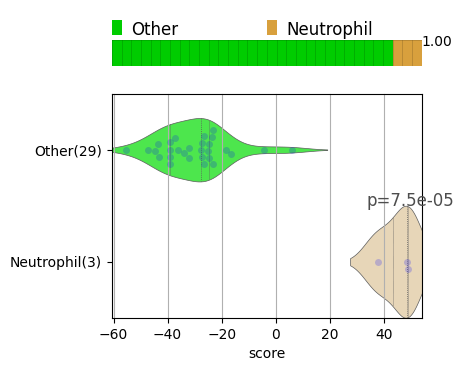

In [6]:
# All genes
ana = EosAnalysis()
ana.getJeffrey2006(tn=2)
fig = bone.processData(ana, [genes], [1], None, 1)

This gene signature can also separate neutrophils from closely related eosinophils.

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [26, 3, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[129]


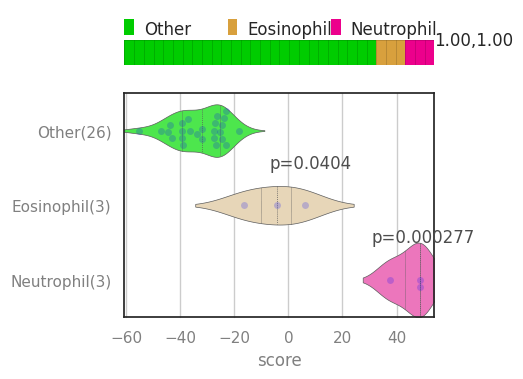

In [9]:
# All genes
ana.getJeffrey2006(tn=3)
fig = bone.processData(ana, [genes], [1], None, 1)

We can now look at which individual genes have the top ROC-AUC in separating neutrophils.

In [5]:
def rankROCAUC(ana, genes):
    rocauc_dict = {}
    for i in genes:
        try:
            print(i)
            c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, [[i]], [1], debug=0)
            rocauc_dict[i] = roc_auc
        except:
            aliases = geneinfo.getAlias(i, species="human")
            aliases = [aliases] if isinstance(aliases, str) else aliases
            print("alias:", aliases)
            if aliases:
                for a in aliases:
                    try:
                        c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, [[a]], [1], debug=0)
                        rocauc_dict[i] = roc_auc                
                    except:
                        print(a, "not found")
    return rocauc_dict
# pd.DataFrame(rocauc_dict.items()).sort_values(1, ascending=False)

In [16]:
ana = EosAnalysis()
ana.getJeffrey2006(tn=2)
jeffreyROCAUC = rankROCAUC(ana, genes)

ana = EosAnalysis()
ana.getNorvershtern2011(tn=2)
novROCAUC = rankROCAUC(ana, genes)

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
CHST15
[1]
ROC-AUC 1.00
[-0.06791262642644345, 29.382590257997826, -0.5679126264264435, 0.43208737357355653]
0.08349587470810378 -0.06791262642644345
DOCK5
[2]
ROC-AUC 0.98
[0.3544768873087251, 14.245190804065135, -0.14552311269127488, 0.8544768873087252]
0.14424377776967728 0.3544768873087251
CXCR2
[1]
ROC-AUC 1.00
[-0.055060060834051155, 18.03292701806605, -0.5550600608340511, 0.4449399391659489]
0.0854571143616734 -0.055060060834051155
TMCC3
No results
alias: None
RAB11FIP1
[1]
ROC-AUC 1.00
[-0.1091194489248797, 34.70772352495478, -0.6091194489248797, 0.3908805510751203]
0.07123333012965155 -0.1091194489248797
LRRK2
No results
alias: None
TMEM49
alias: ['EPG3', 'TANGO5', 'TMEM49']
EPG3 not found
TANGO5 not found
TMEM49 not found
SLC15A4
alias: ['FP12591', 'PHT1', 'PTR4']
FP12591 not found
PHT1 not fo

[3]
ROC-AUC 0.91
[-0.13839829596774839, 20.809646628892096, -0.6383982959677483, 0.3616017040322516]
0.23486978086607058 -0.13839829596774839
RERE
[4]
ROC-AUC 1.00
[-0.2901243407702813, 29.95550664373177, -0.7901243407702814, 0.20987565922971868]
0.21955318565118337 -0.2901243407702813
KCNJ15
[2]
ROC-AUC 1.00
[-0.21479059260207906, 34.01527126800188, -0.714790592602079, 0.28520940739792094]
0.1598772356966719 -0.21479059260207906
IGF2R
[2]
ROC-AUC 1.00
[-0.14270561340218407, 15.305451193035134, -0.642705613402184, 0.3572943865978159]
0.1550049659240643 -0.14270561340218407
HSD17B11
[1]
ROC-AUC 0.95
[-0.14495909473583463, 22.755259151177707, -0.6449590947358346, 0.3550409052641654]
0.07894190823280307 -0.14495909473583463
MME
[2]
ROC-AUC 1.00
[-0.12954728471539217, 34.89845248481423, -0.6295472847153922, 0.3704527152846078]
0.16629576599304627 -0.12954728471539217
NOTCH2
[4]
ROC-AUC 0.94
[-0.864486134970108, 25.804263709205944, -1.3644861349701078, -0.36448613497010796]
0.32538739681224

[1]
ROC-AUC 0.71
[-0.2042487935856491, 151.418932185555, -0.7042487935856491, 0.29575120641435093]
0.12155611639257852 -0.2042487935856491
dJ30M3.3 not found
hTDP2 not found
C12orf35
alias: ['C12orf35', 'GET', 'KIAA1551', 'UTA2-1']
C12orf35 not found
GET not found
KIAA1551 not found
UTA2-1 not found
ST6GALNAC2
[1]
ROC-AUC 0.83
[-0.25372069439337896, 149.85495709541547, -0.753720694393379, 0.24627930560662104]
0.11611527578912981 -0.25372069439337896
MYLIP
[1]
ROC-AUC 0.52
[-0.26062907562762766, 121.03331154835725, -0.7606290756276277, 0.23937092437237234]
0.1347452320994828 -0.26062907562762766
PPTC7
alias: ['TA-PP2C', 'TAPP2C']
TA-PP2C not found
TAPP2C not found
PILRA
[2]
ROC-AUC 0.93
[-0.38649372835895224, 227.67381215555832, -0.8864937283589522, 0.11350627164104776]
0.21124669427782286 -0.38649372835895224
BACH1
[2]
ROC-AUC 0.83
[-0.5643932007179441, 130.4070627951521, -1.064393200717944, -0.06439320071794408]
0.15746097618368543 -0.5643932007179441
WIPF1
alias: ['PRPL-2', 'WAS2', '

In [25]:
ana = EosAnalysis()
ana.getNorvershtern2011(tn=2)
novROCAUC = rankROCAUC(ana, genes)

Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [28, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
CHST15
alias: ['BRAG', 'GALNAC4S-6ST']
BRAG not found
GALNAC4S-6ST not found
DOCK5
No results
alias: None
CXCR2
alias: ['CD182', 'CDw128b', 'CMKAR2', 'IL8R2', 'IL8RA', 'IL8RB', 'WHIMS2']
CD182 not found
CDw128b not found
CMKAR2 not found
IL8R2 not found
IL8RA not found
IL8RB not found
WHIMS2 not found
TMCC3
No results
alias: None
RAB11FIP1
alias: ['NOEL1A', 'RCP', 'rab11-FIP1']
NOEL1A not found
RCP not found
rab11-FIP1 not found
LRRK2
No results
alias: None
TMEM49
alias: ['EPG3', 'TANGO5', 'TMEM49']
EPG3 not found
TANGO5 not found
TMEM49 not found
SLC15A4
alias: ['FP12591', 'PHT1', 'PTR4']
FP12591 not found
PHT1 not found
PTR4 not found
HAL
alias: ['HIS', 'HSTD']
HIS not found
HSTD not found
NRBF2
alias: ['COPR', 'COPR1', 'COPR2', 'NRBF-2']
COPR not found
COPR1 not found
COPR2 not found
NRBF-2 not foun

[1]
ROC-AUC 0.87
[-0.1919756731201867, 188.85145394164348, -0.6919756731201867, 0.3080243268798133]
0.11517580508845413 -0.1919756731201867
WHIMS2 not found
TMCC3
No results
alias: None
RAB11FIP1
[2]
ROC-AUC 0.93
[-1.5750910555321949, 123.16716091975808, -2.075091055532195, -1.0750910555321949]
0.18808726520056895 -1.5750910555321949
LRRK2
No results
alias: None
TMEM49
[1]
ROC-AUC 0.96
[-0.12867998803119285, 113.04756616725673, -0.6286799880311928, 0.37132001196880715]
0.10595188514518378 -0.12867998803119285
SLC15A4
alias: ['FP12591', 'PHT1', 'PTR4']
FP12591 not found
PHT1 not found
PTR4 not found
HAL
[2]
ROC-AUC 0.93
[-0.2475703189857769, 211.19004253666228, -0.7475703189857769, 0.25242968101422314]
0.18249208811082485 -0.2475703189857769
NRBF2
[1]
ROC-AUC 0.98
[-0.31500550688378115, 107.2662107724082, -0.8150055068837812, 0.18499449311621885]
0.11671347786927715 -0.31500550688378115
RGS2
[1]
ROC-AUC 0.88
[-0.08552339436589076, 166.0732727035618, -0.5855233943658907, 0.41447660563410

[2]
ROC-AUC 0.87
[-0.4736542017195095, 98.75151828479623, -0.9736542017195096, 0.026345798280490496]
0.17620028189582043 -0.4736542017195095
HSD17B11
alias: ['17-BETA-HSD11', '17-BETA-HSDXI', '17BHSD11', 'DHRS8', 'PAN1B', 'RETSDR2', 'SDR16C2']
17-BETA-HSD11 not found
17-BETA-HSDXI not found
17BHSD11 not found
[1]
ROC-AUC 0.89
[-0.23258284925172928, 111.7272092279383, -0.7325828492517292, 0.2674171507482707]
0.12356545323621876 -0.23258284925172928
PAN1B not found
RETSDR2 not found
SDR16C2 not found
MME
[2]
ROC-AUC 0.67
[-0.32532186760700865, 110.29869251626819, -0.8253218676070087, 0.17467813239299135]
0.2730106150617826 -0.32532186760700865
NOTCH2
[4]
ROC-AUC 0.92
[-0.6511463950812637, 104.5184125281799, -1.1511463950812637, -0.1511463950812637]
0.4116287488059696 -0.6511463950812637
TMEM154
No results
alias: None
RUNX2
[3]
ROC-AUC 0.32
[-2.036061052692275, 104.56625480021728, -2.536061052692275, -1.536061052692275]
0.3127286259895552 -2.036061052692275
PKN2
[4]
ROC-AUC 0.66
[-1.00909

In [30]:
import operator
sorted(novROCAUC.items(), key=operator.itemgetter(1), reverse=True)

[('GIMAP4', 0.9901477832512315),
 ('LAMP2', 0.9870689655172414),
 ('NRBF2', 0.9802955665024631),
 ('VNN3', 0.9741379310344828),
 ('CLEC7A', 0.9716748768472906),
 ('TMEM49', 0.9636699507389163),
 ('MIR21', 0.9636699507389163),
 ('NUMB', 0.9556650246305418),
 ('TREM1', 0.9532019704433499),
 ('CRISPLD2', 0.9470443349753694),
 ('CTBS', 0.9445812807881773),
 ('CHST15', 0.9415024630541872),
 ('ZCCHC6', 0.937807881773399),
 ('HAL', 0.9341133004926108),
 ('RAB11FIP1', 0.9291871921182265),
 ('PILRA', 0.9285714285714285),
 ('FAM49A', 0.916871921182266),
 ('NOTCH2', 0.916871921182266),
 ('EMR2', 0.916256157635468),
 ('GLIPR1', 0.9088669950738917),
 ('PGCP', 0.895320197044335),
 ('HSD17B11', 0.8928571428571428),
 ('GAB2', 0.8860837438423645),
 ('PICALM', 0.8817733990147782),
 ('RGS2', 0.8793103448275863),
 ('EGLN1', 0.8793103448275862),
 ('NEDD9', 0.8762315270935962),
 ('IL13RA1', 0.8719211822660098),
 ('IGF2R', 0.8713054187192117),
 ('CXCR2', 0.8676108374384236),
 ('PELI2', 0.8663793103448276),
 

Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [28, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
[159]
Allantaz 2011 Neu Eos (n = 33)
GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6
33 [25, 3, 5] GSE28491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NEU6 NEU6
[159]


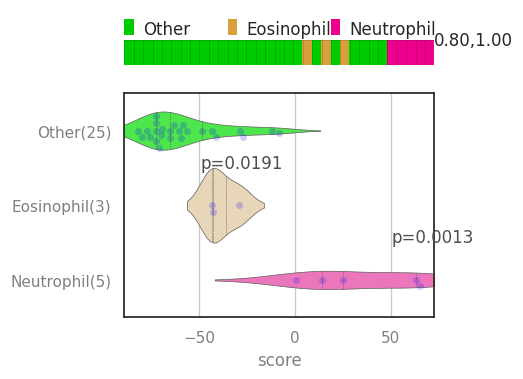

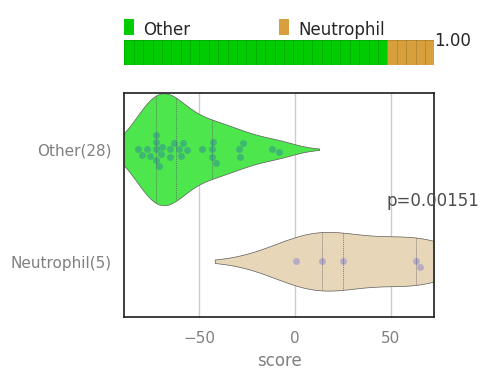

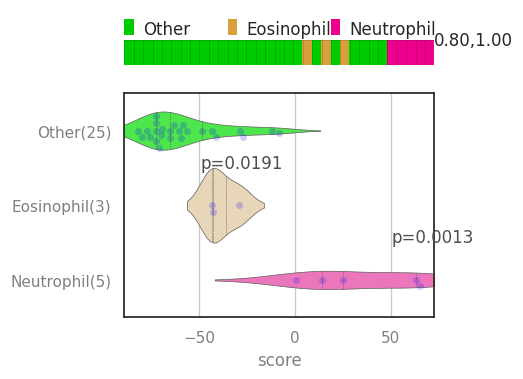

In [8]:
ana.getAllantaz2011(tn=2)
bone.processData(ana, [genes], [1], None, 1)
ana.getAllantaz2011(tn=3)
bone.processData(ana, [genes], [1], None, 1)

In [32]:
novROCAUC["DOCK5"]

0.7598522167487685

In [33]:
jeffreyROCAUC["DOCK5"]

0.9770114942528736

Jeffrey 2006 Mac Eos (n = 32)
GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52
32 [29, 3] GSE3982 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV52 MACV52
[1]


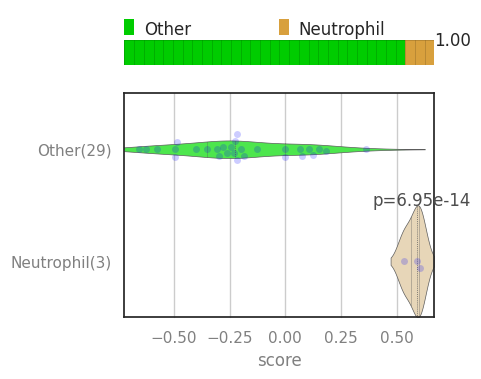

In [10]:
ana = EosAnalysis()
ana.getJeffrey2006(tn=2)
fig = bone.processData(ana, [["FCGR3A"]], [1], None, 1)

Dr Sahoo's idea: find genes with X hi => FCGR3A hi and then use those genes as a seed gene for BECC.

In [50]:
res = 'GPR97 SIRPB1 NLRP12 HCG27 --- FCGR2A FCGR3B FPR1 TNFRSF10C IL8RB IL8RA LILRA1 MMP25 CCR3 CR1 SLC11A1 MGC31957 EMR3 FPR2 FPR2 CEACAM3 TNFRSF10C PILRA SIGLEC5 TLR8 FFAR2 CLEC4A PILRA CLEC4E NLRP12 OR52K3P --- --- --- --- NFAM1'
res = res.split(" ")
res = [i for i in res if i != "---"]

In [51]:
res = "FCGR3A IL8RA DOCK5 TNFRSF10C".split(" ")

FCGR3A
IL8RA
DOCK5
TNFRSF10C


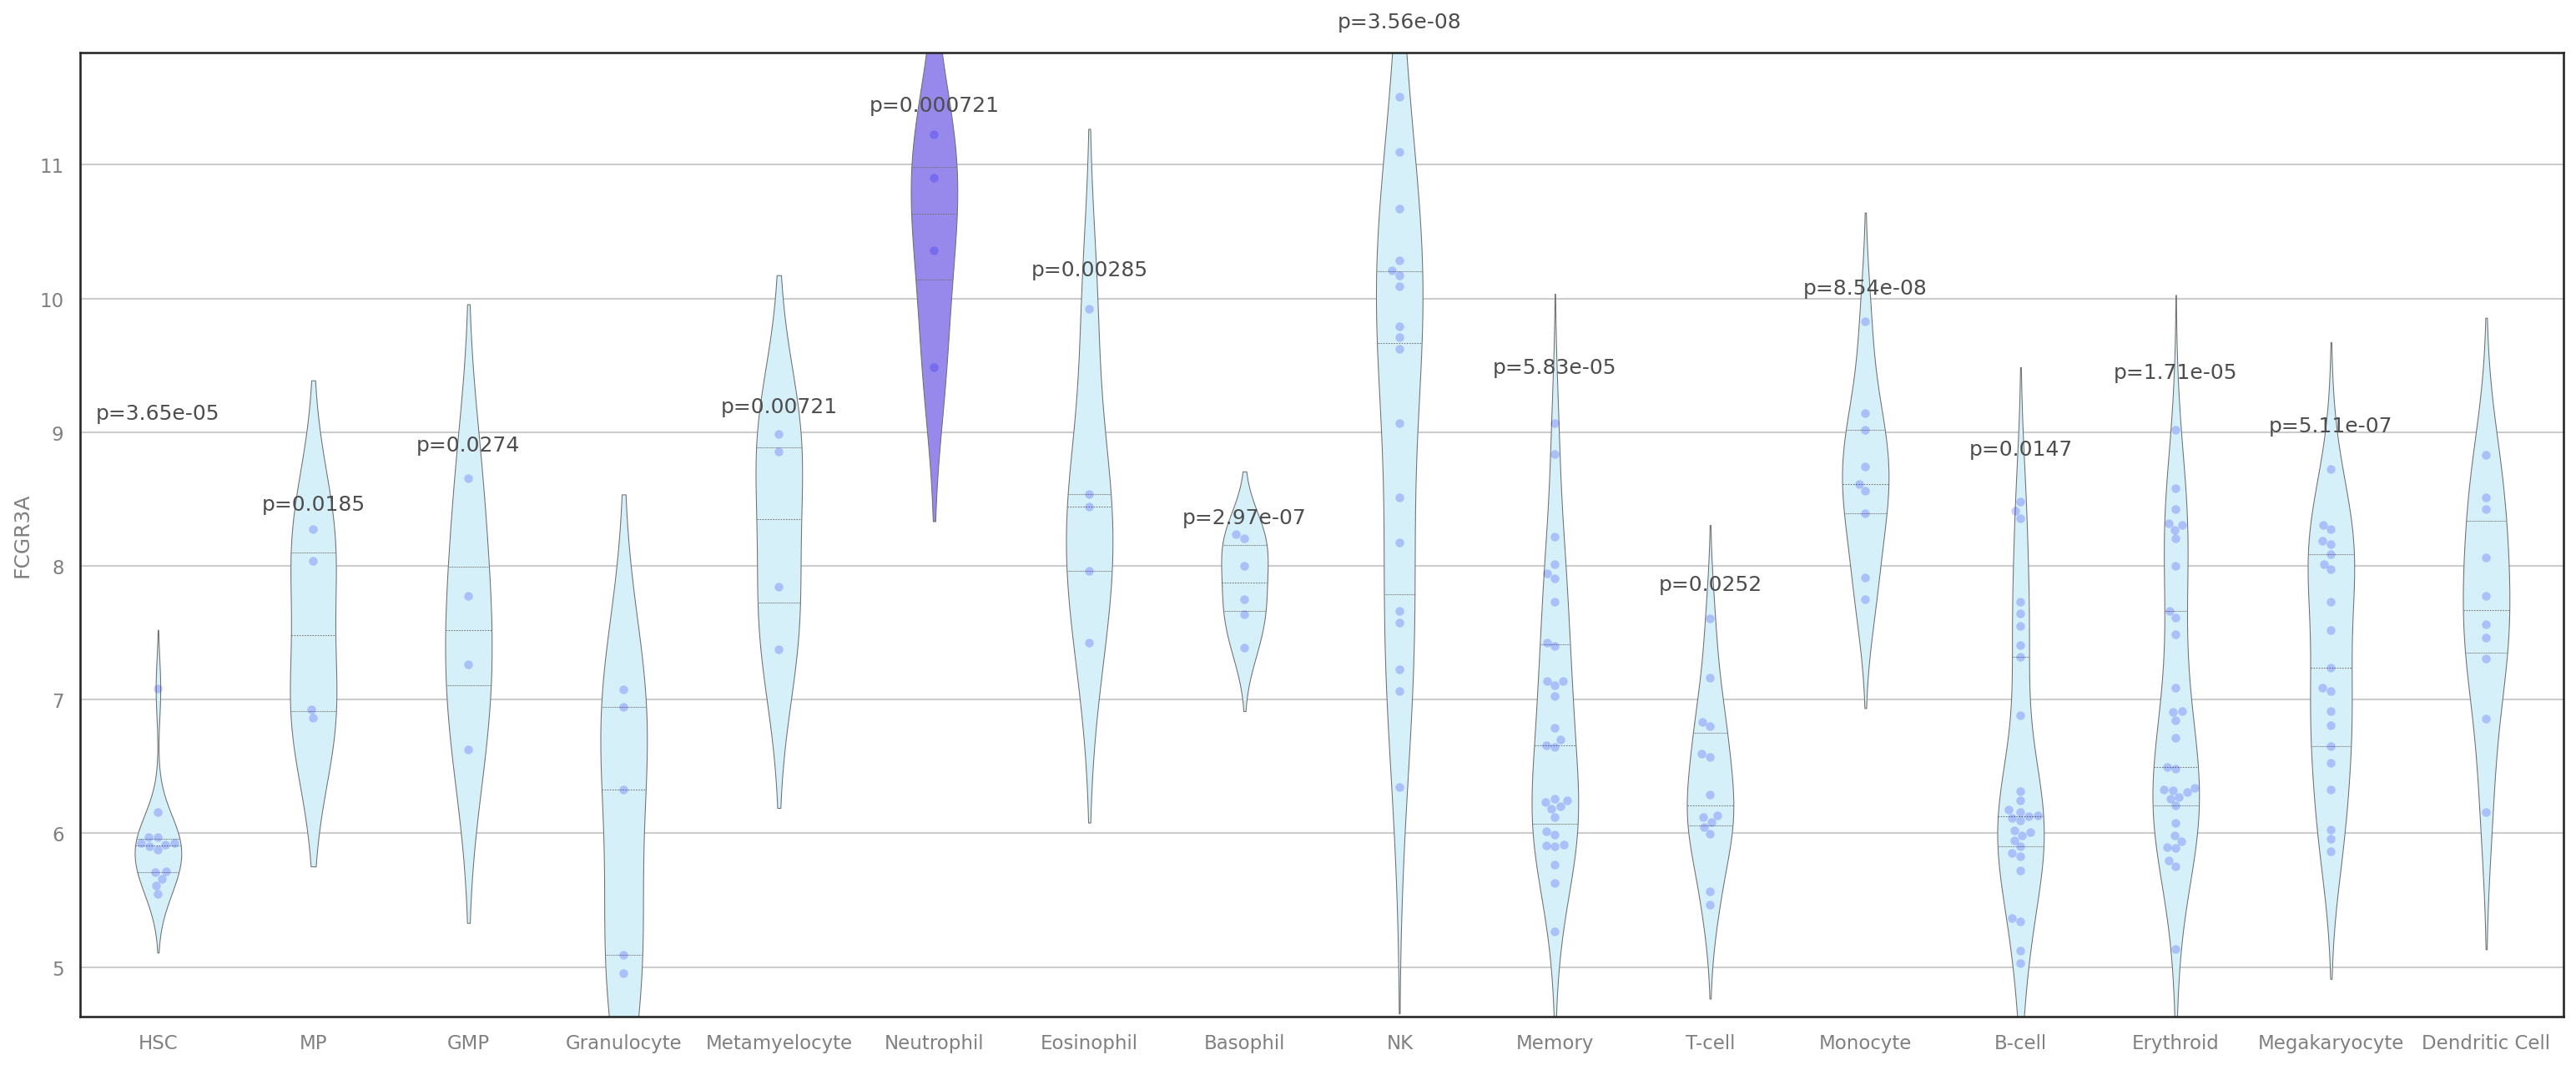

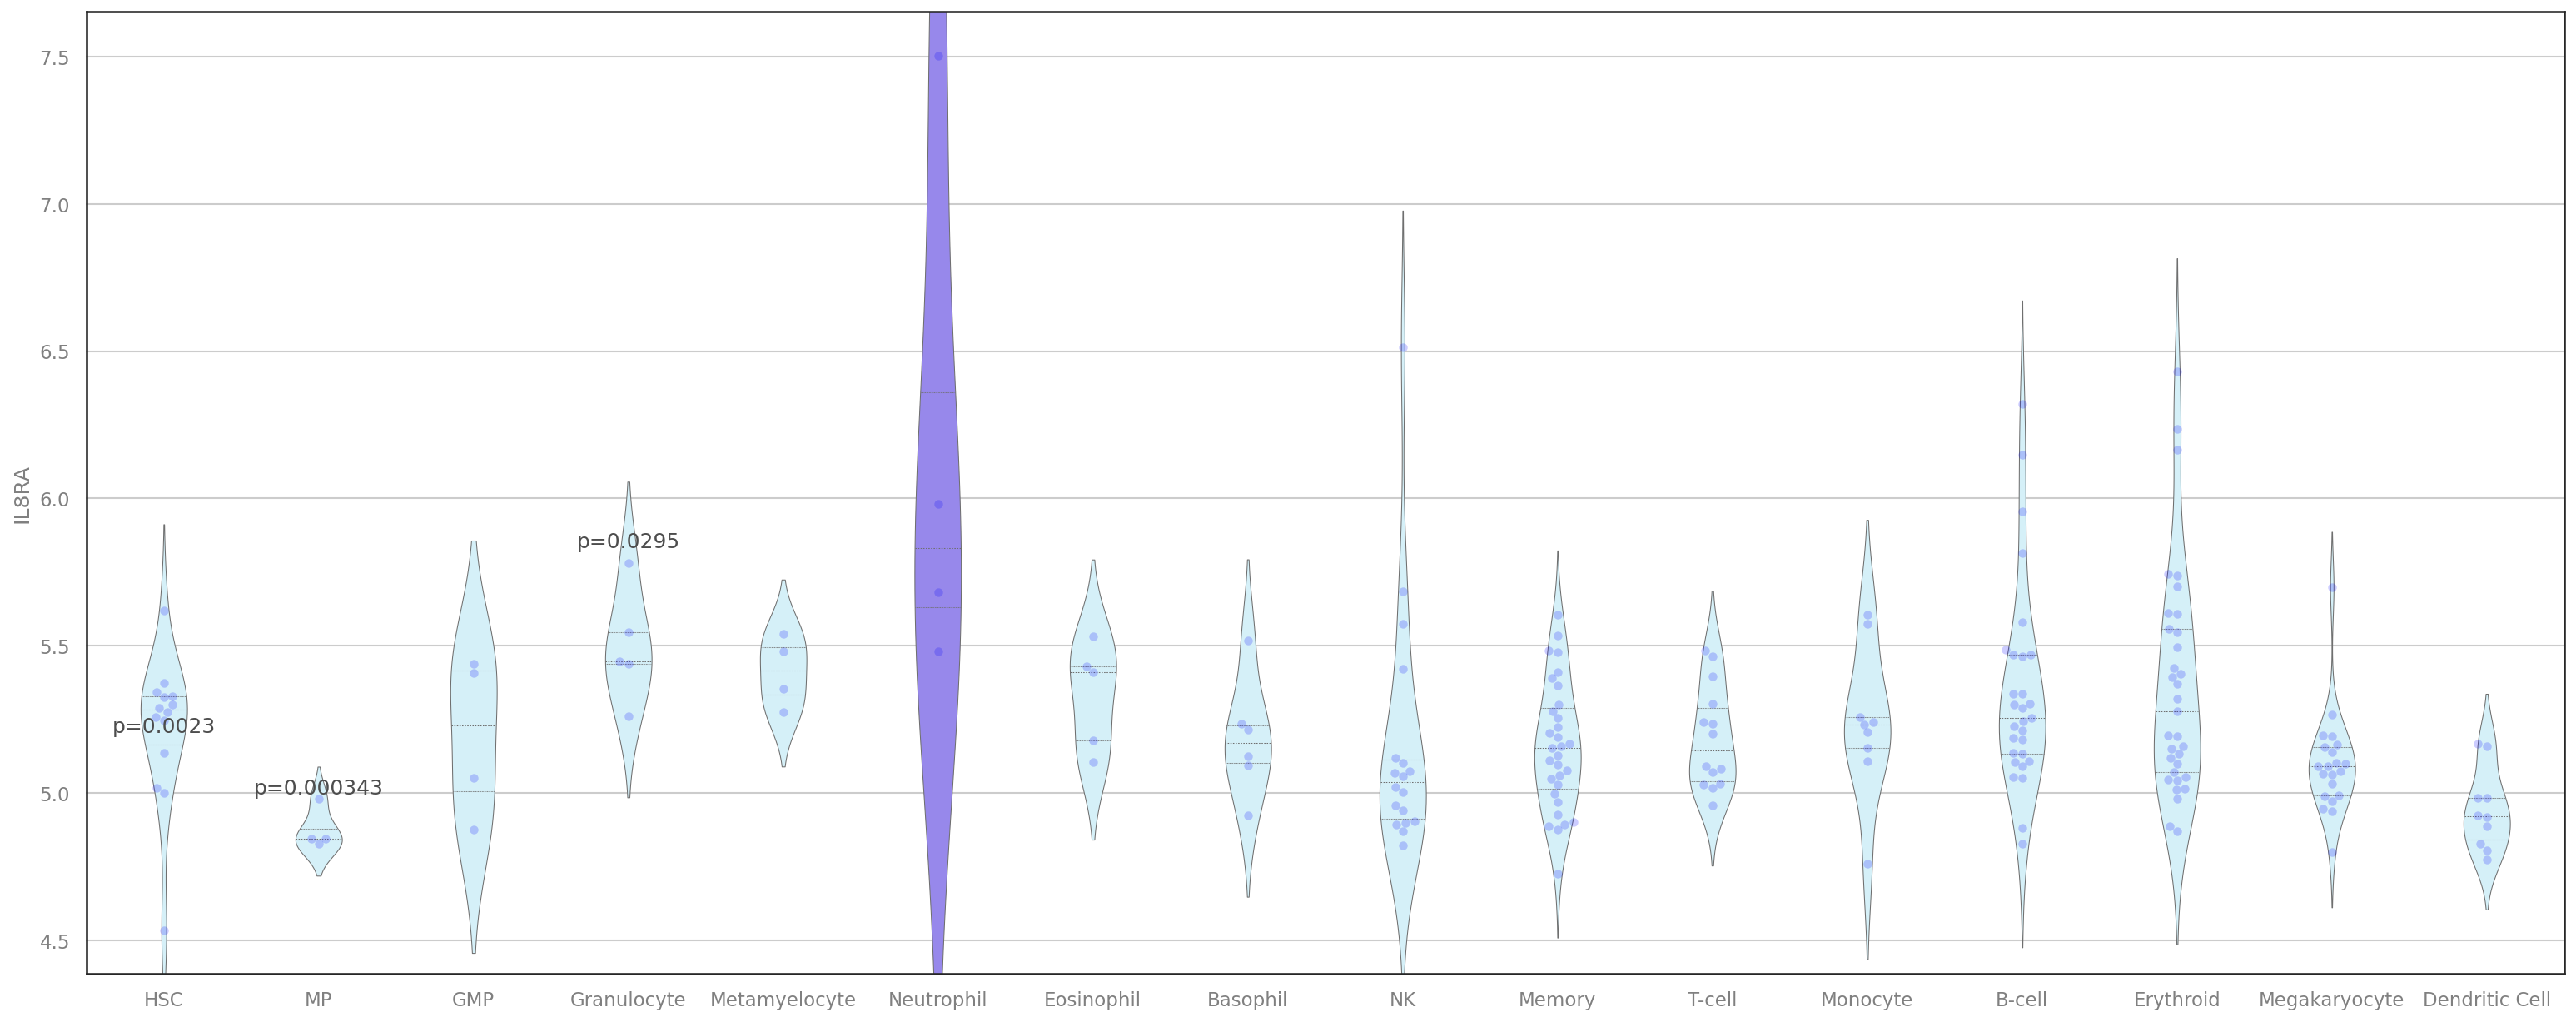

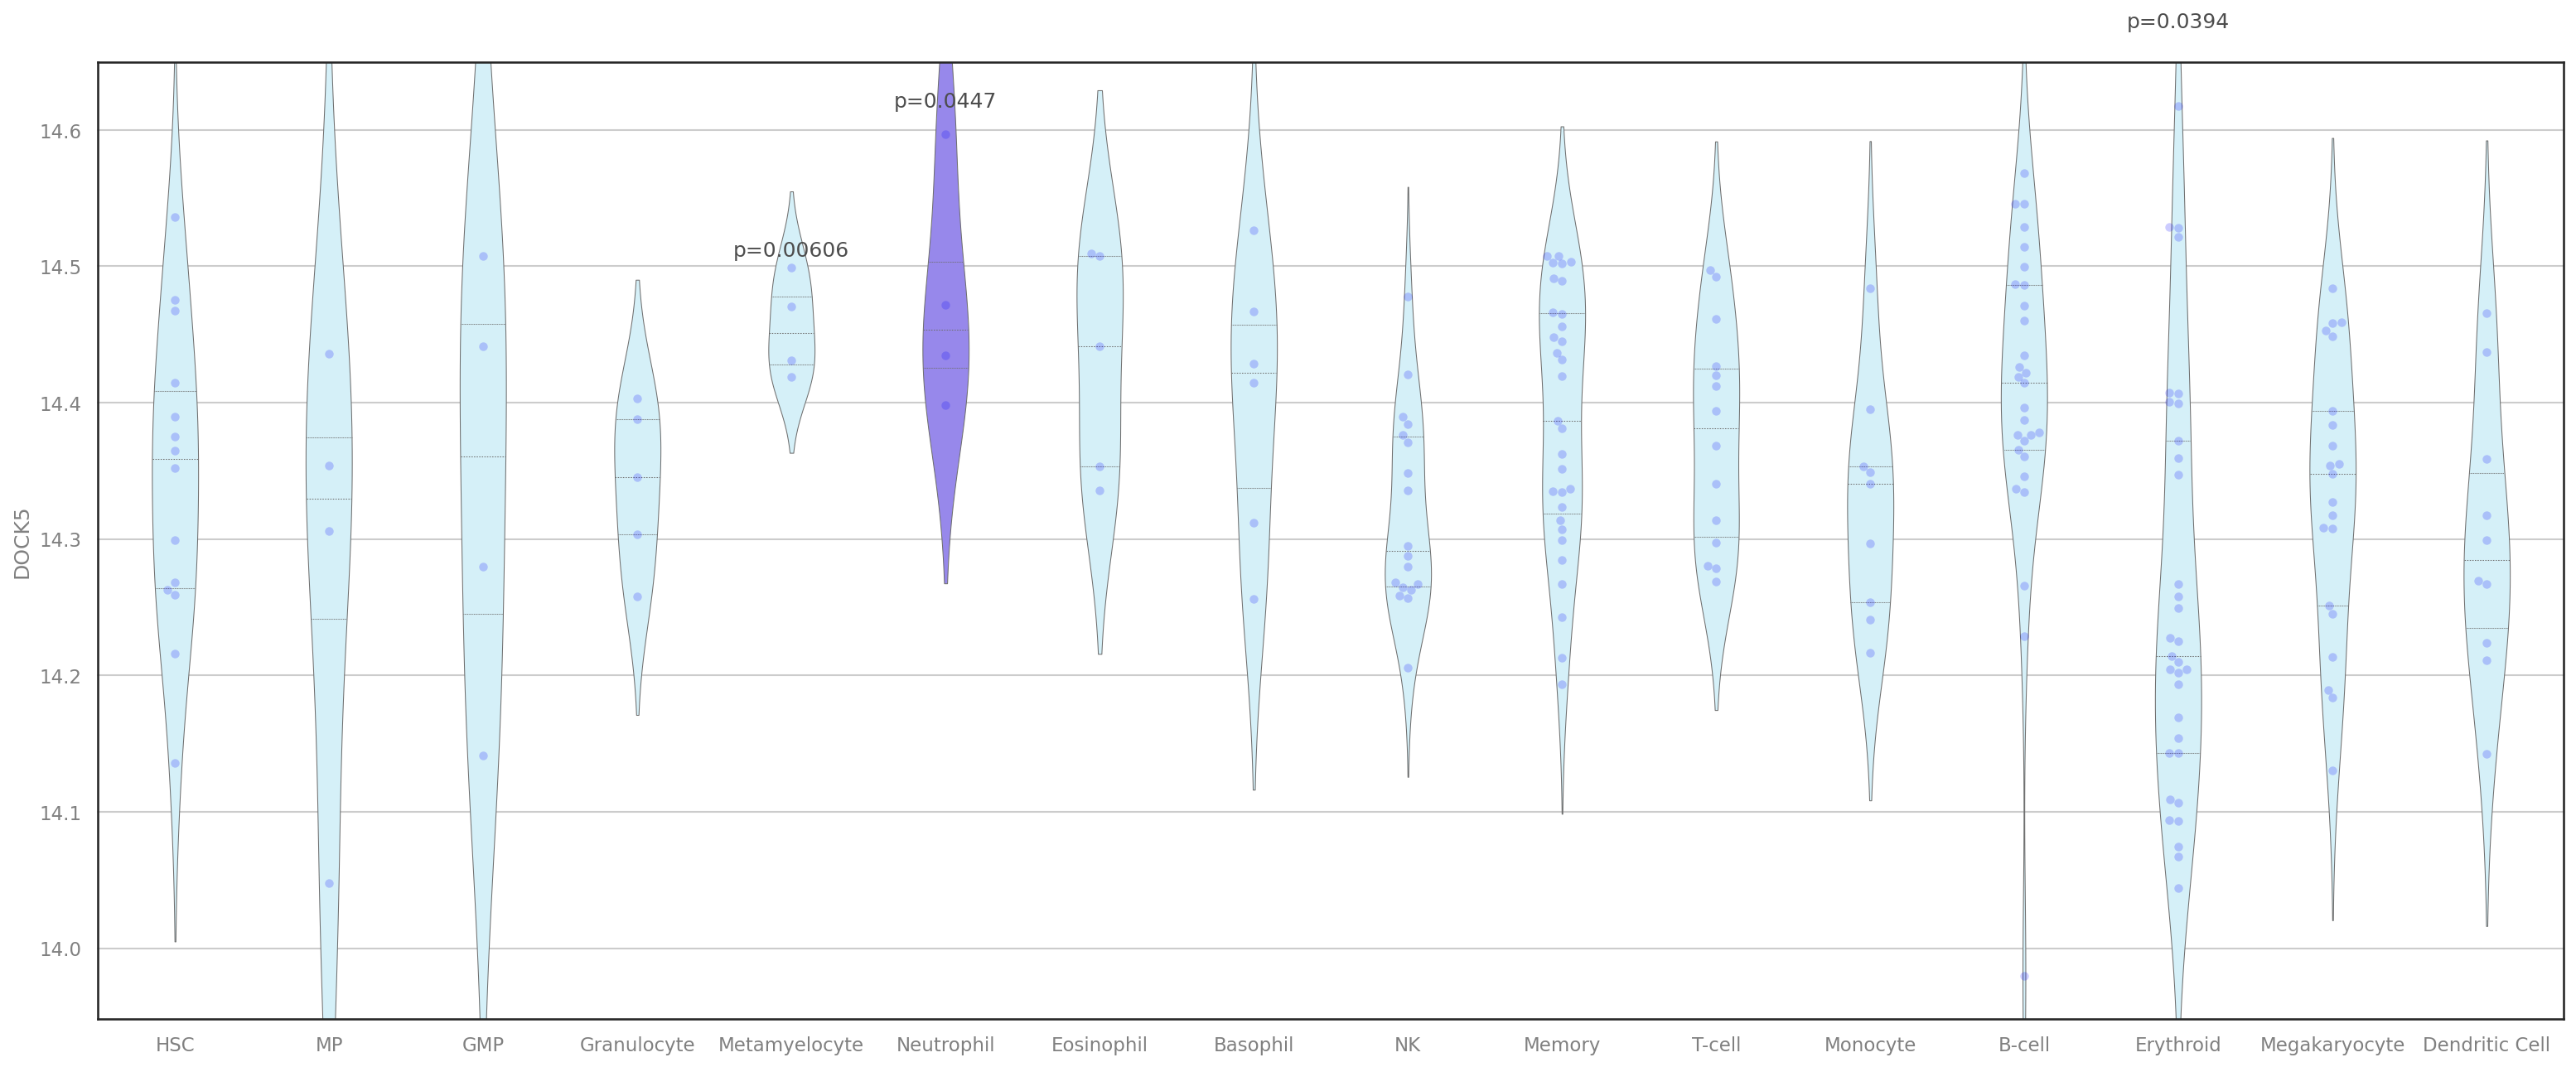

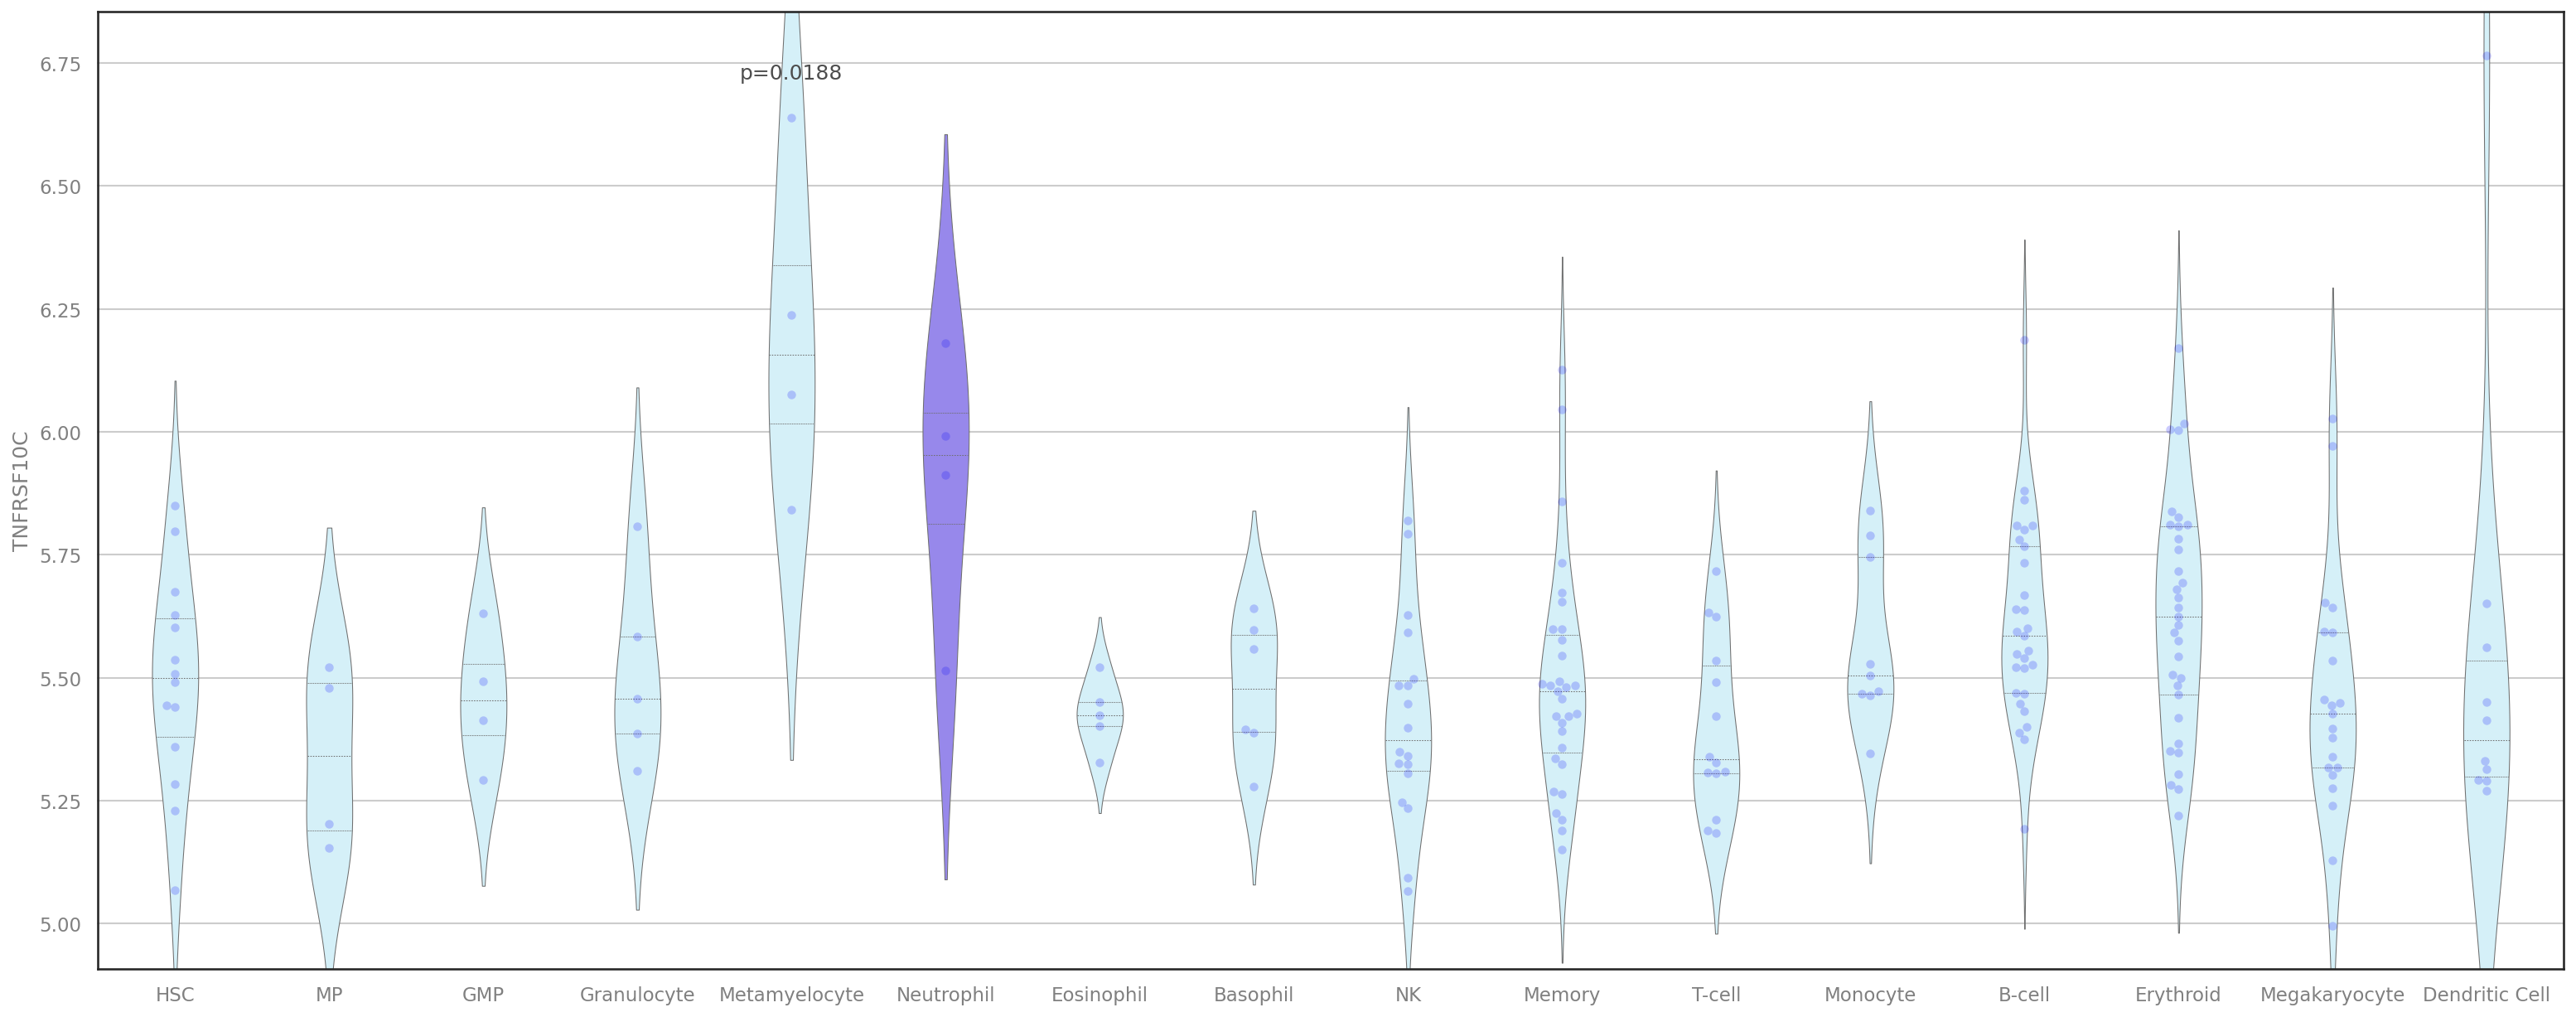

In [38]:
# Violin plot in Novershtern dataset
h = getDataset("G19")
samples = getNorvershternSamples(tn=2)
testGenes(res, samples, tn=2, w=1.6, h=10, highlight="Neutrophil")

FCGR3A
IL8RA
Error or could not find IL8RA
DOCK5
TNFRSF10C


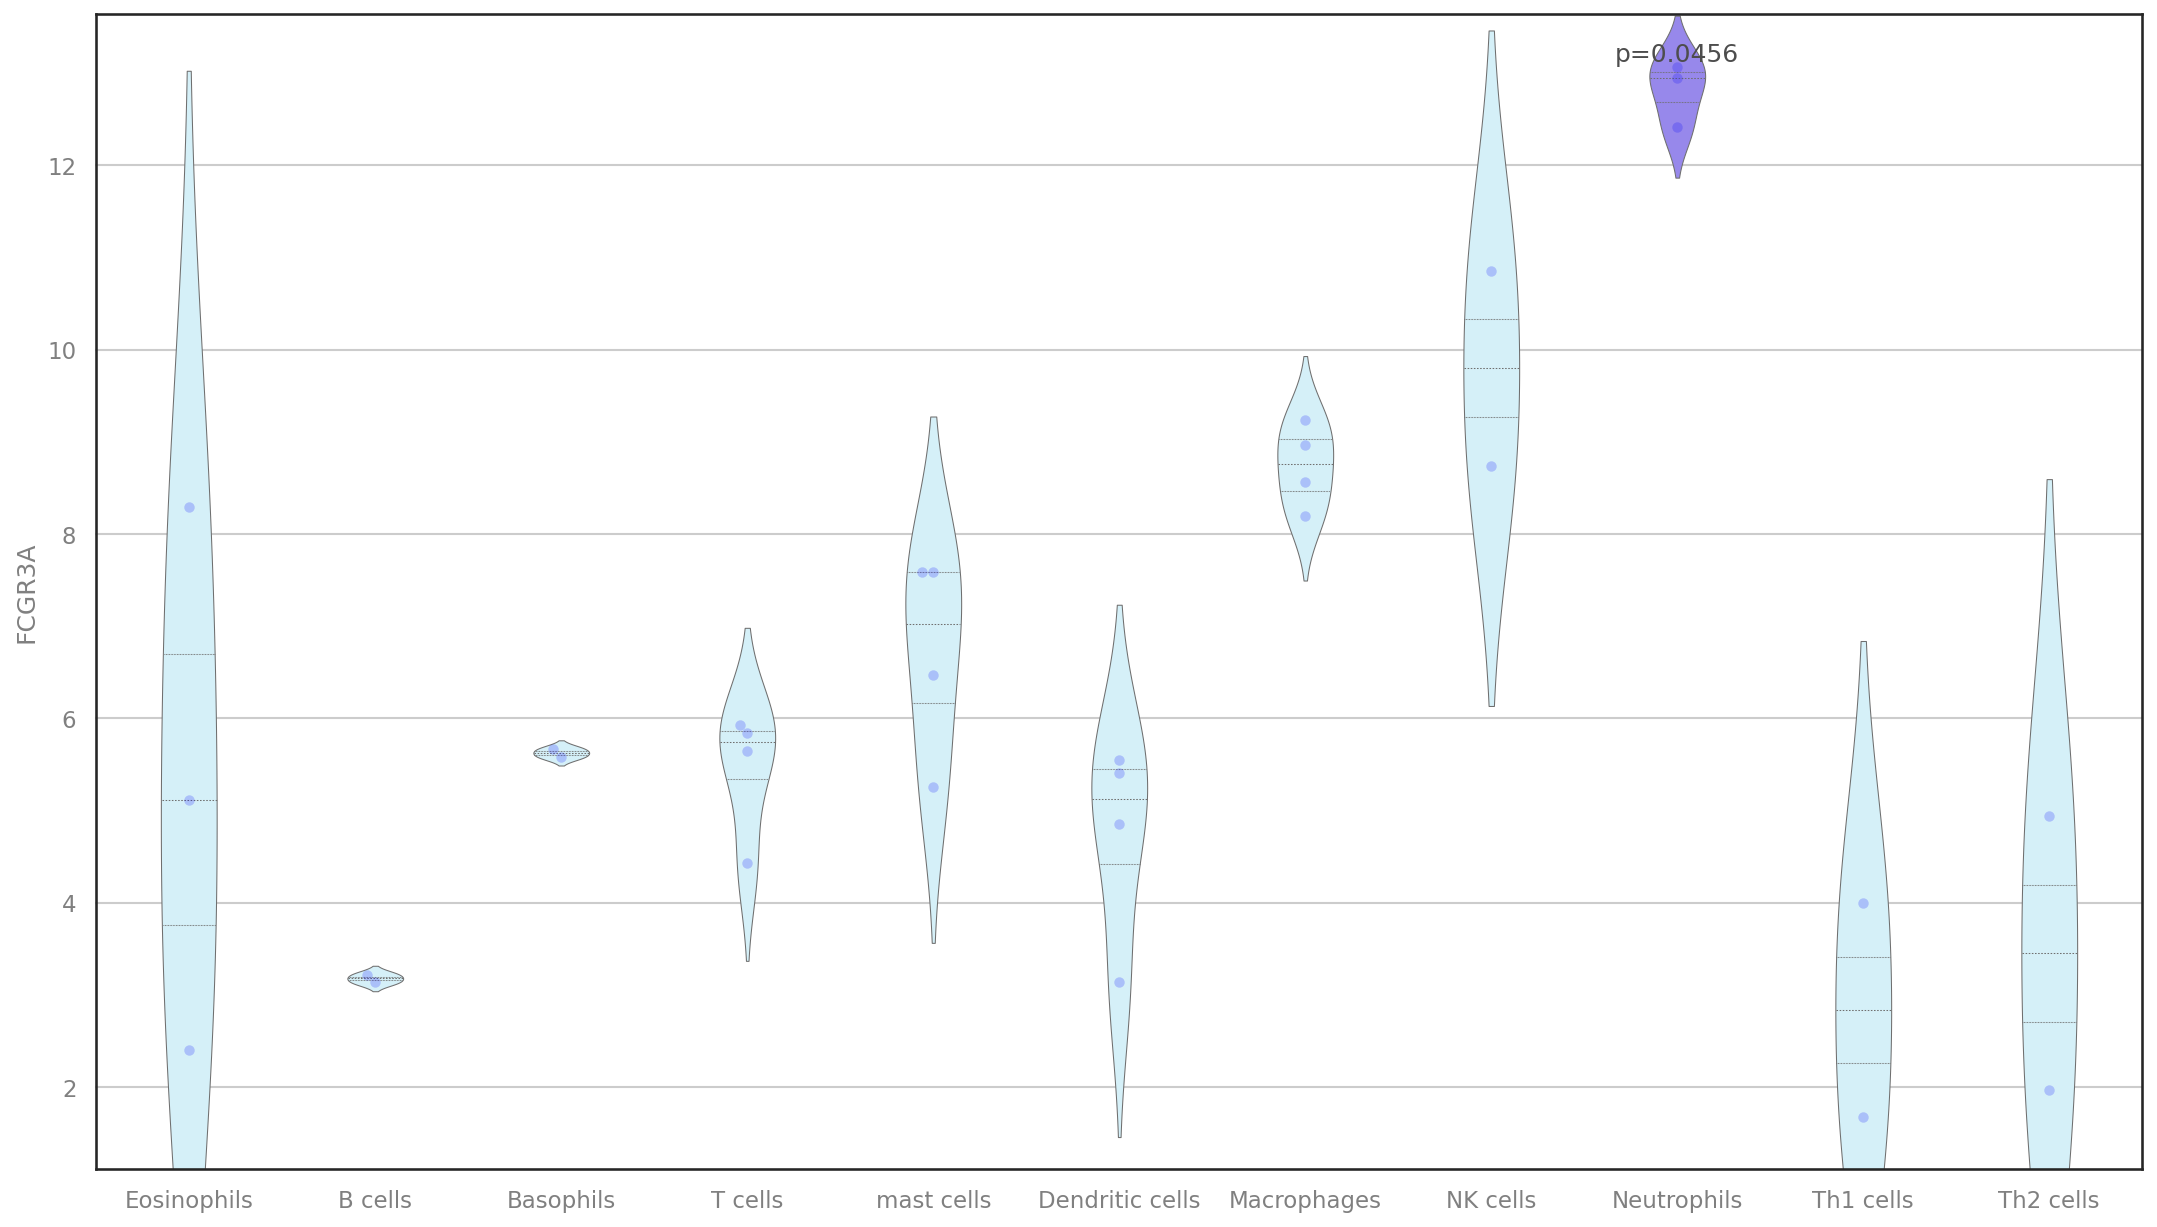

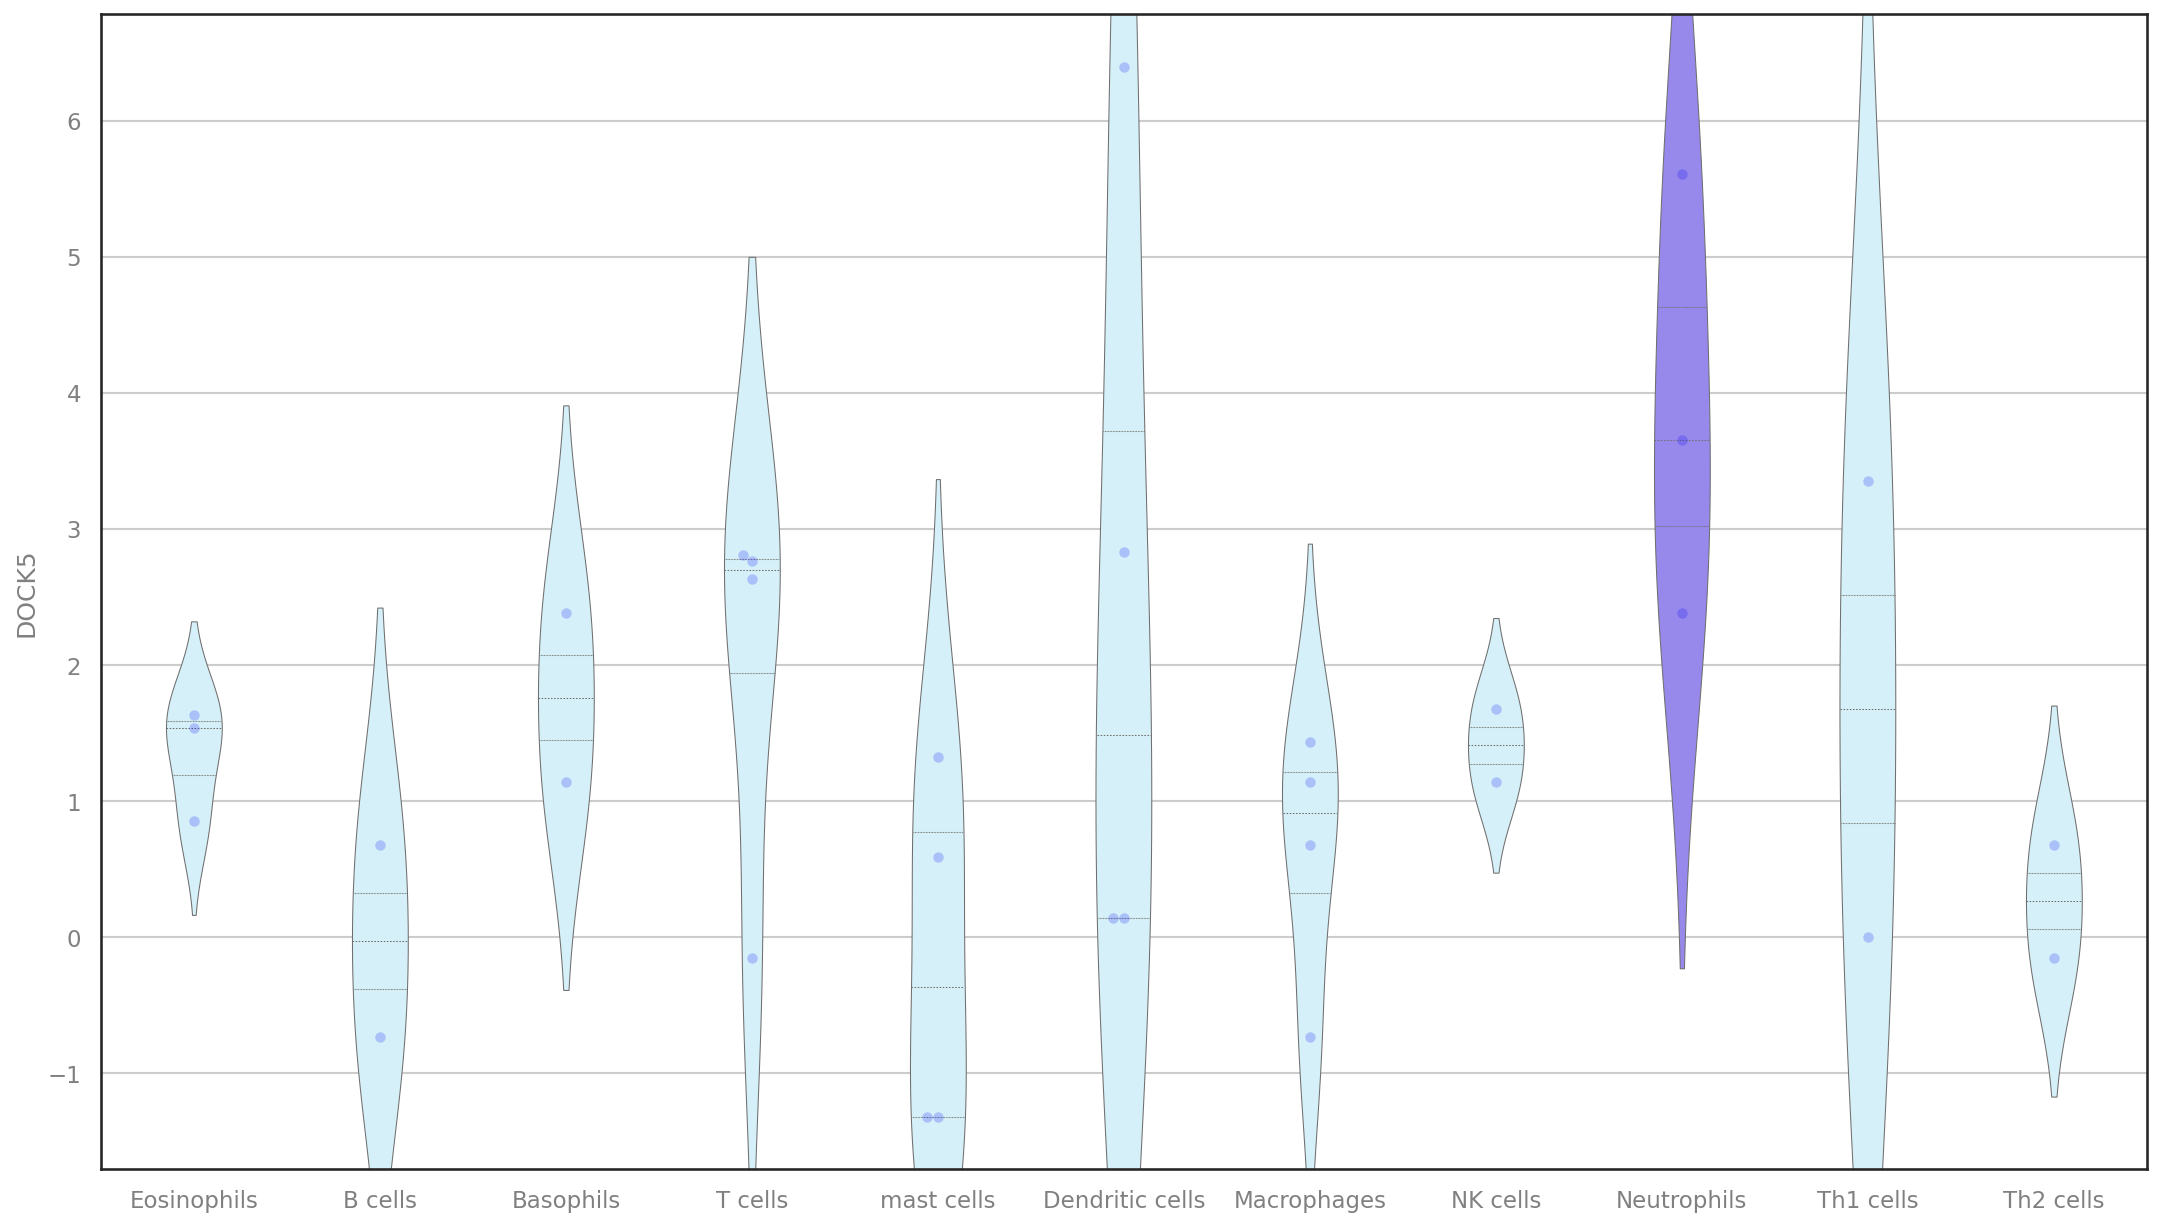

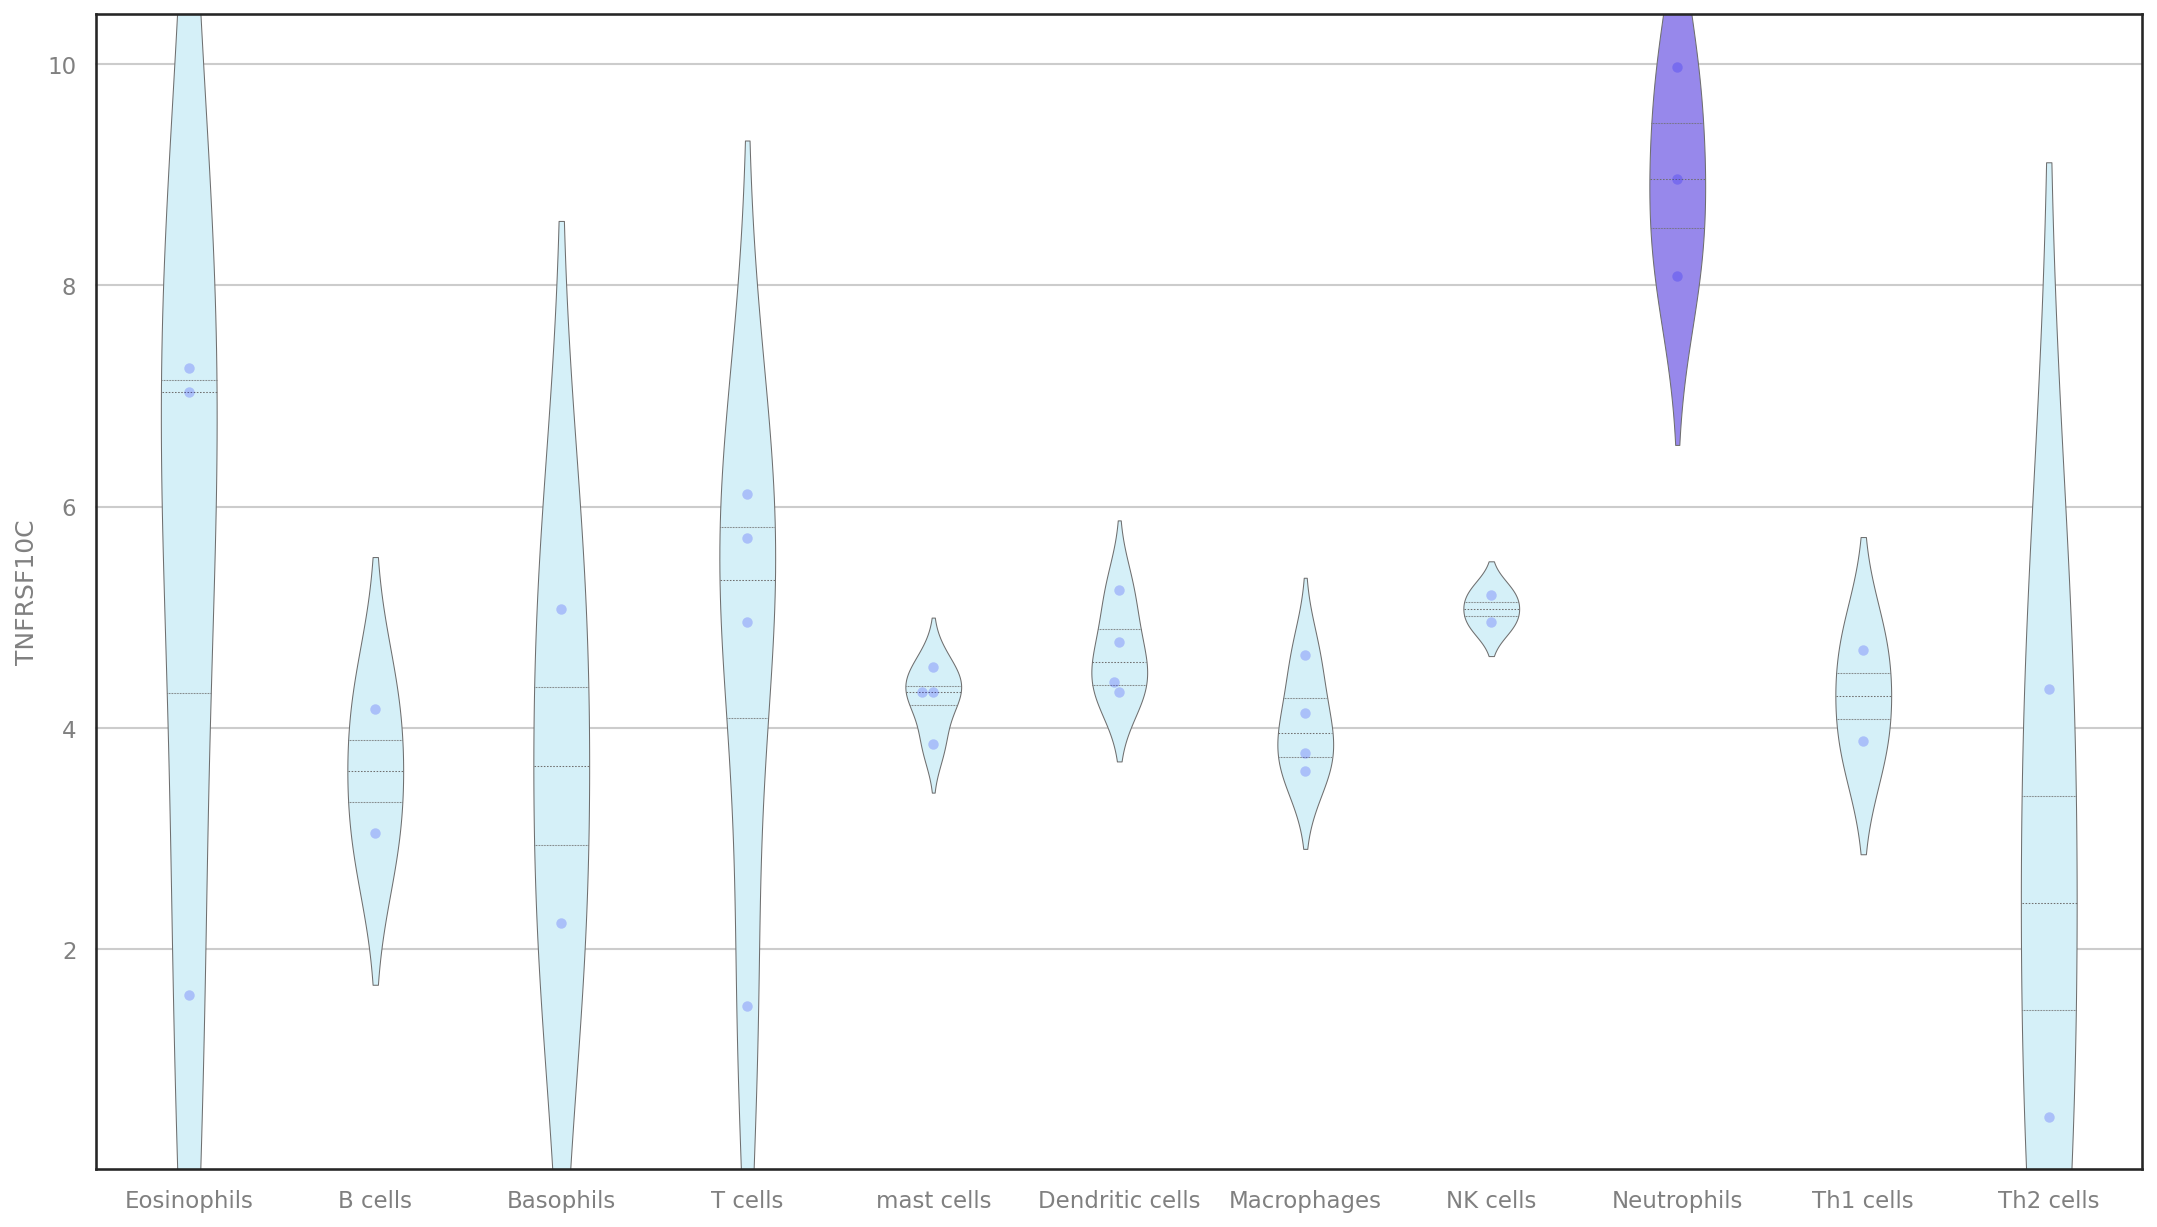

In [41]:
# Violin plot in Jeffrey 2006 dataset
h = getDataset("MACV52")
samples = getJeffreySamples(tn=1)
testGenes(res, samples, tn=2, w=1.6, h=10, highlight="Neutrophils")

FCGR3A
Error or could not find FCGR3A
IL8RA
Error or could not find IL8RA
DOCK5
TNFRSF10C


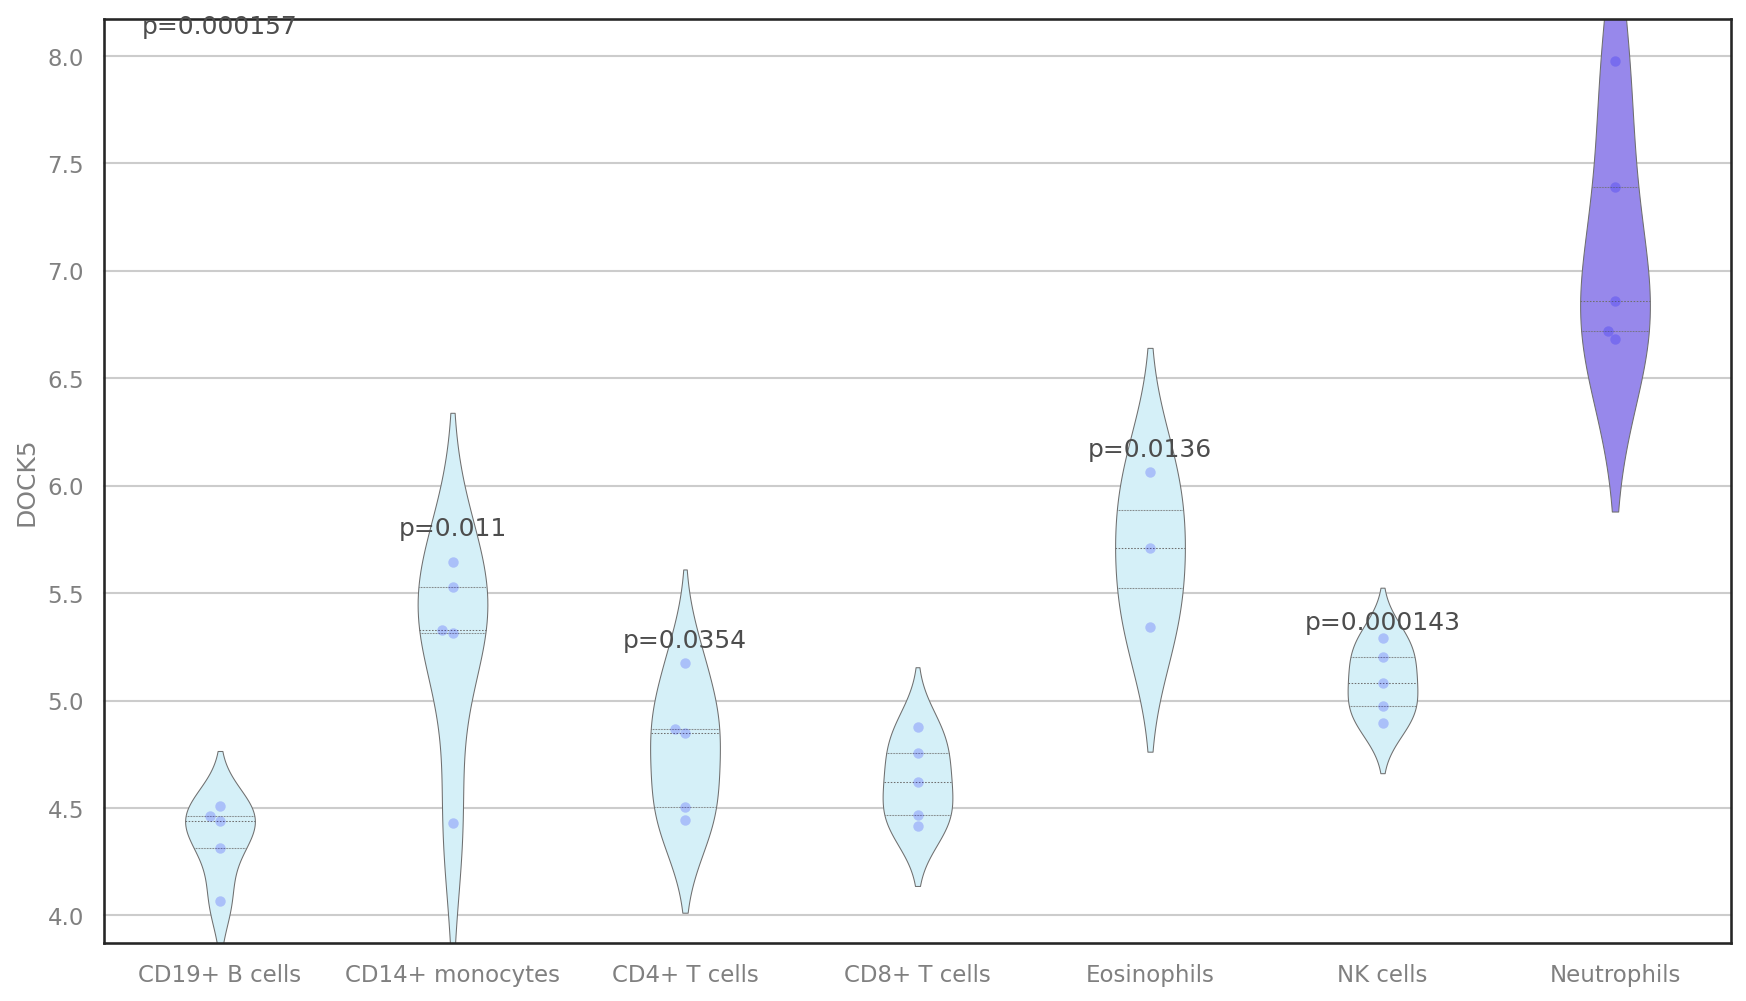

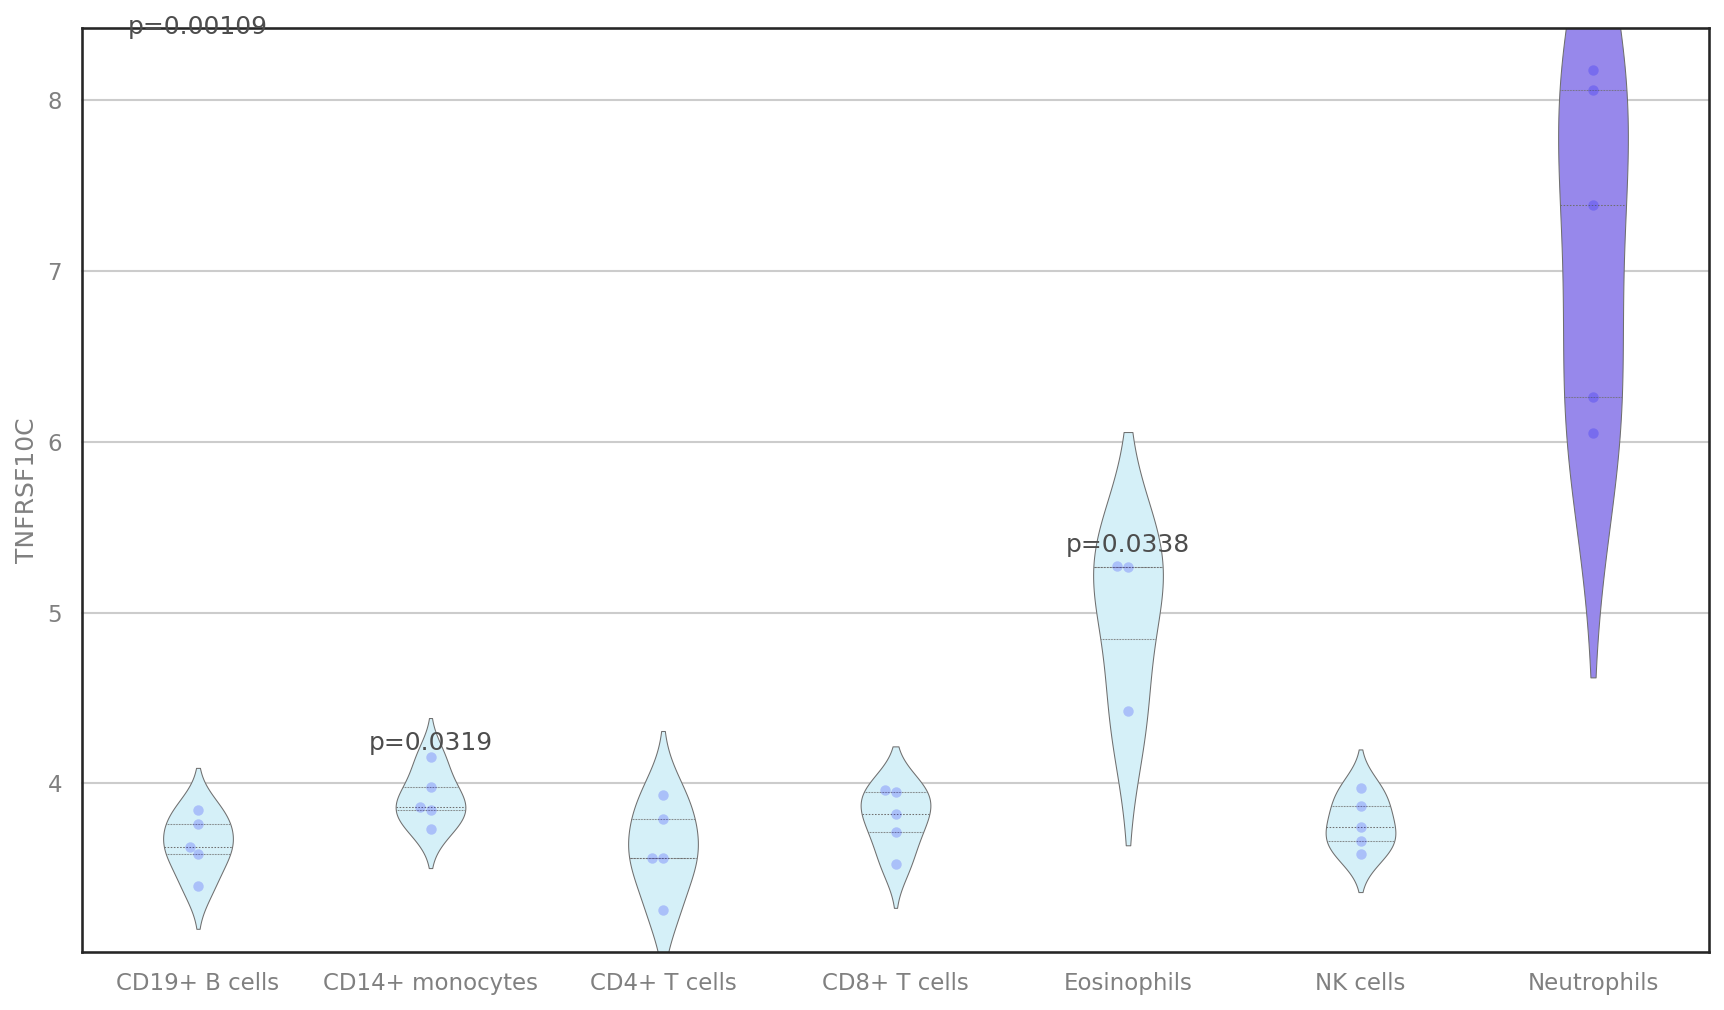

In [52]:
# Violin plot in Allantaz dataset (GSE24891)
h = getDataset("NEU6")
samples = getAllantazSamples()
testGenes(res, samples, tn=1, w=2, h=8, highlight="Neutrophils")

FCGR3A
IL8RA
Error or could not find IL8RA
DOCK5
TNFRSF10C


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3543: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


CD182
Error or could not find CD182
CDw128b
Error or could not find CDw128b
CMKAR2
Error or could not find CMKAR2
IL8R2
Error or could not find IL8R2
IL8RB
Error or could not find IL8RB
WHIMS2
Error or could not find WHIMS2


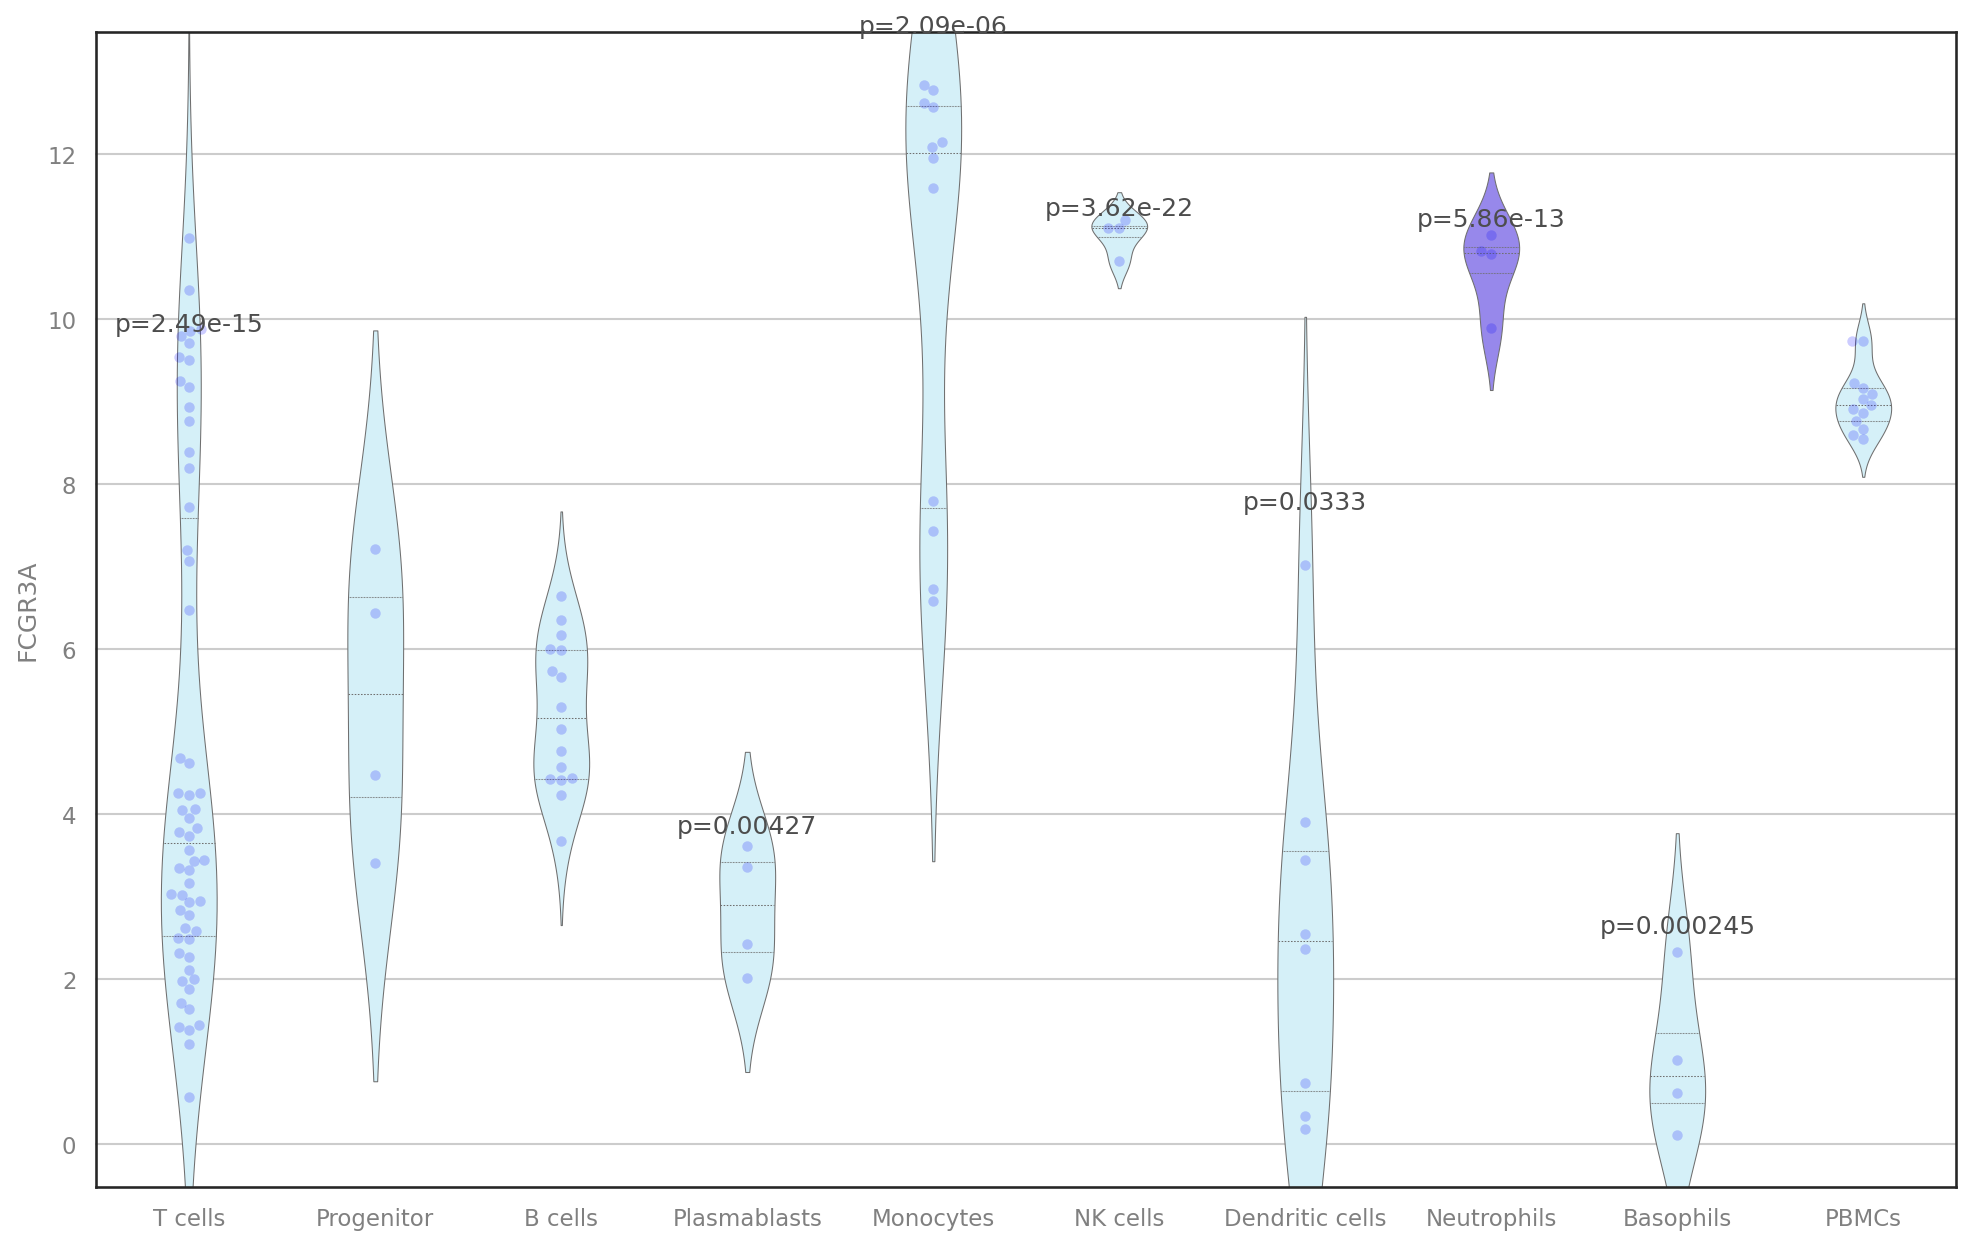

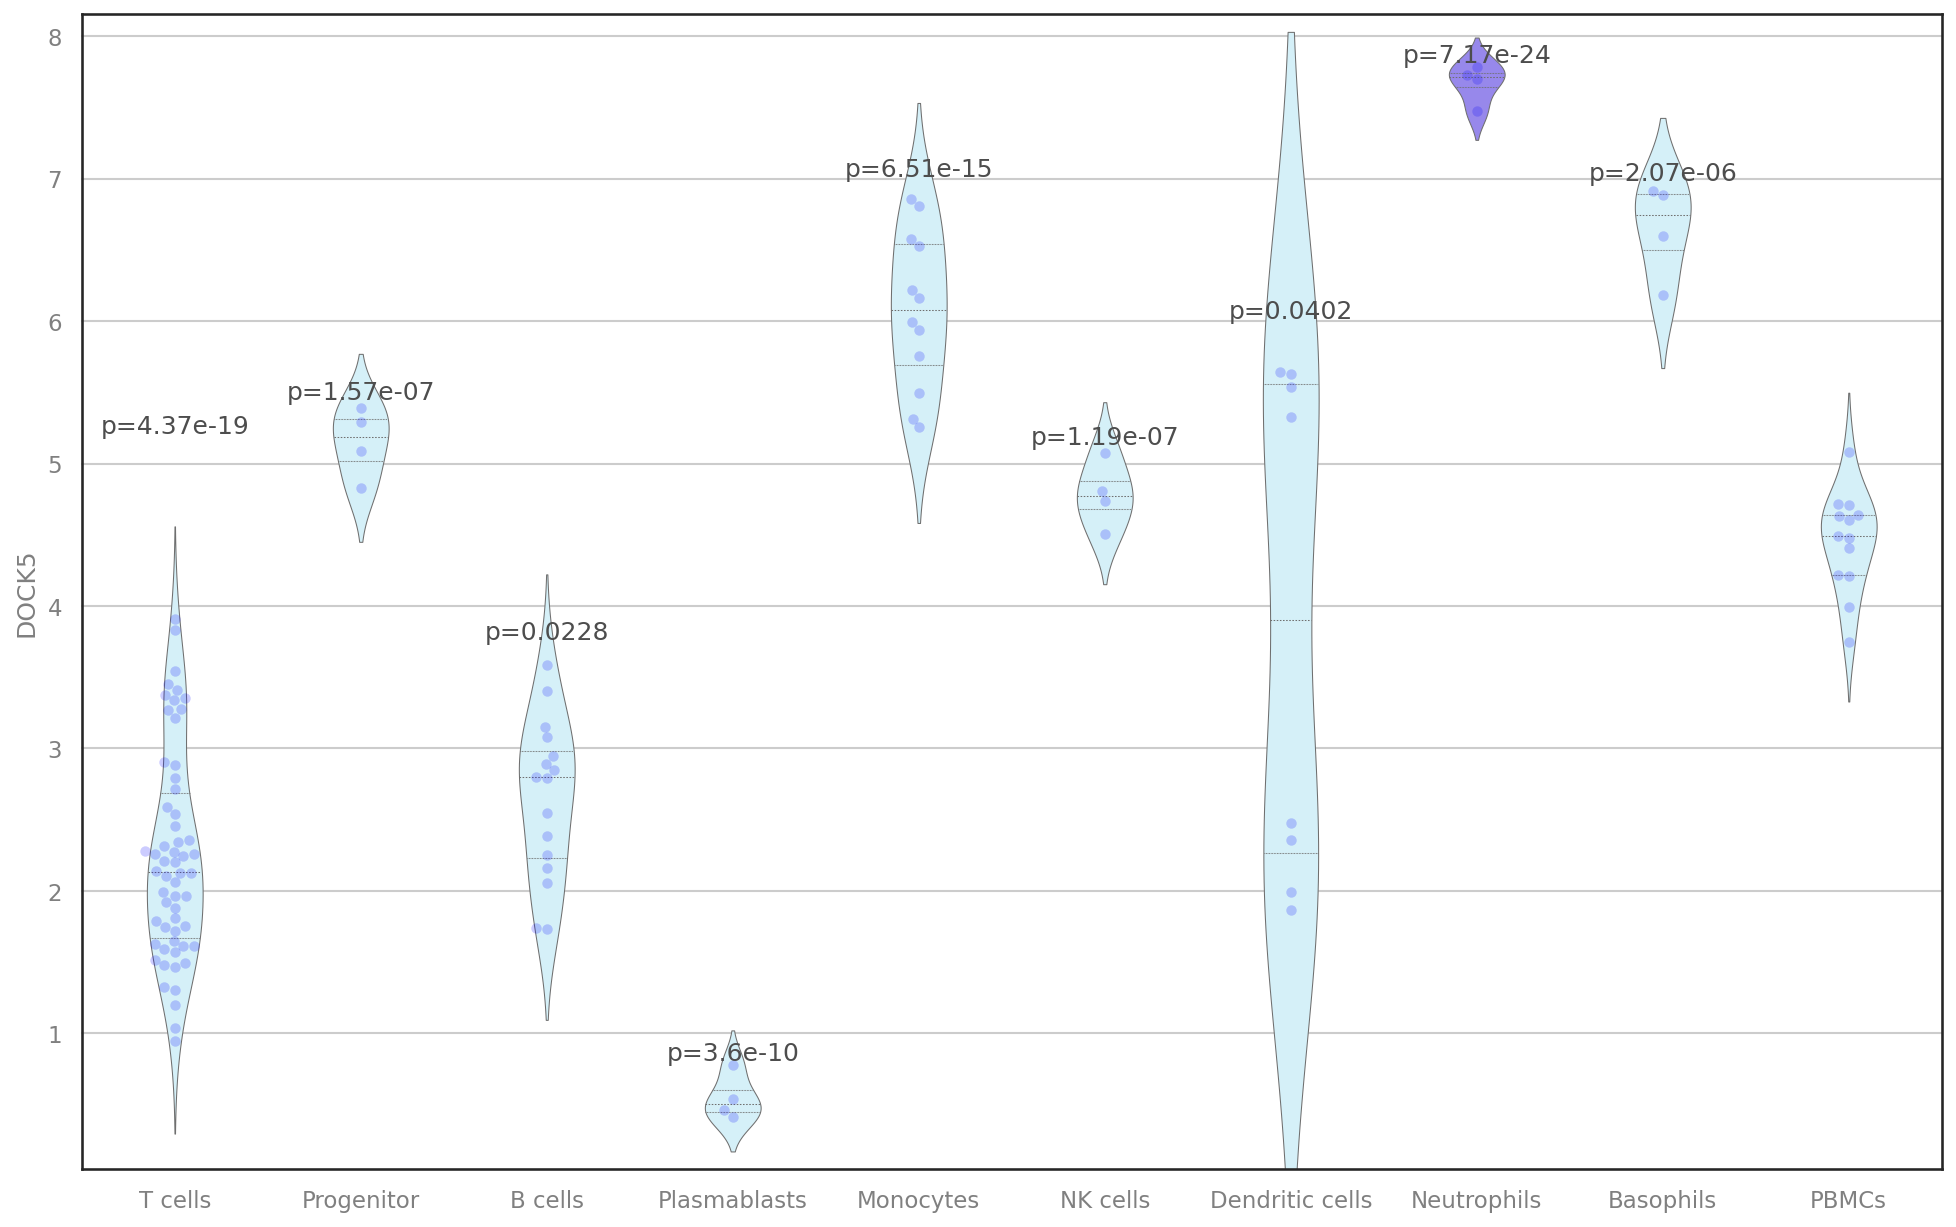

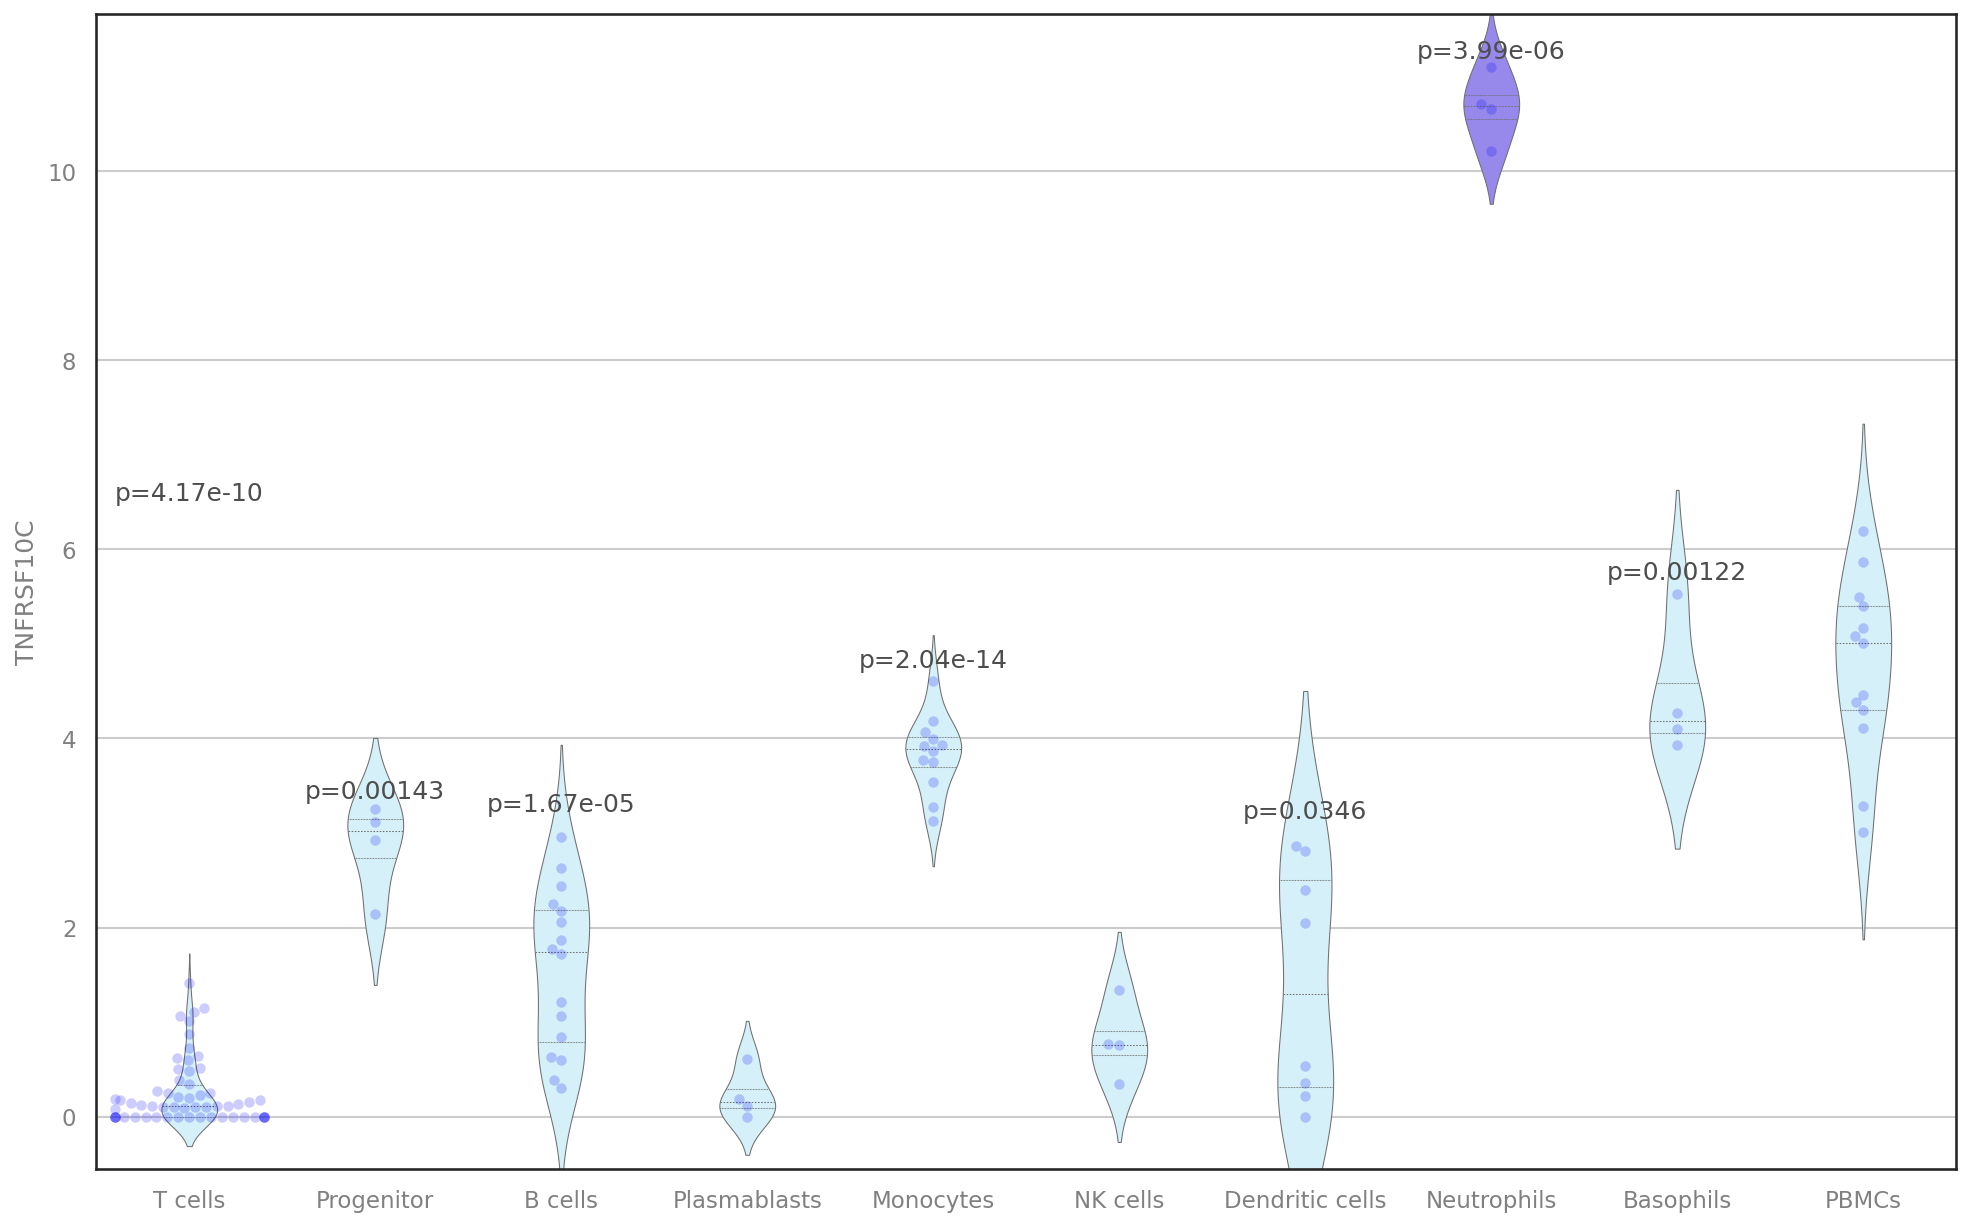

In [55]:
# Violin plot in Monaco dataset (GSE10711)
h = getDataset("NEU12")
samples = getMonacoSamples(tn=1)
testGenes(res, samples, tn=2, w=1.6, highlight="Neutrophils")

In [46]:
import geneinfo
aliases = geneinfo.getAlias("IL8RA", species = "human")
print(" ".join(aliases))

CD182 CDw128b CMKAR2 IL8R2 IL8RA IL8RB WHIMS2


ran ViolinPlot.py
CSF3R


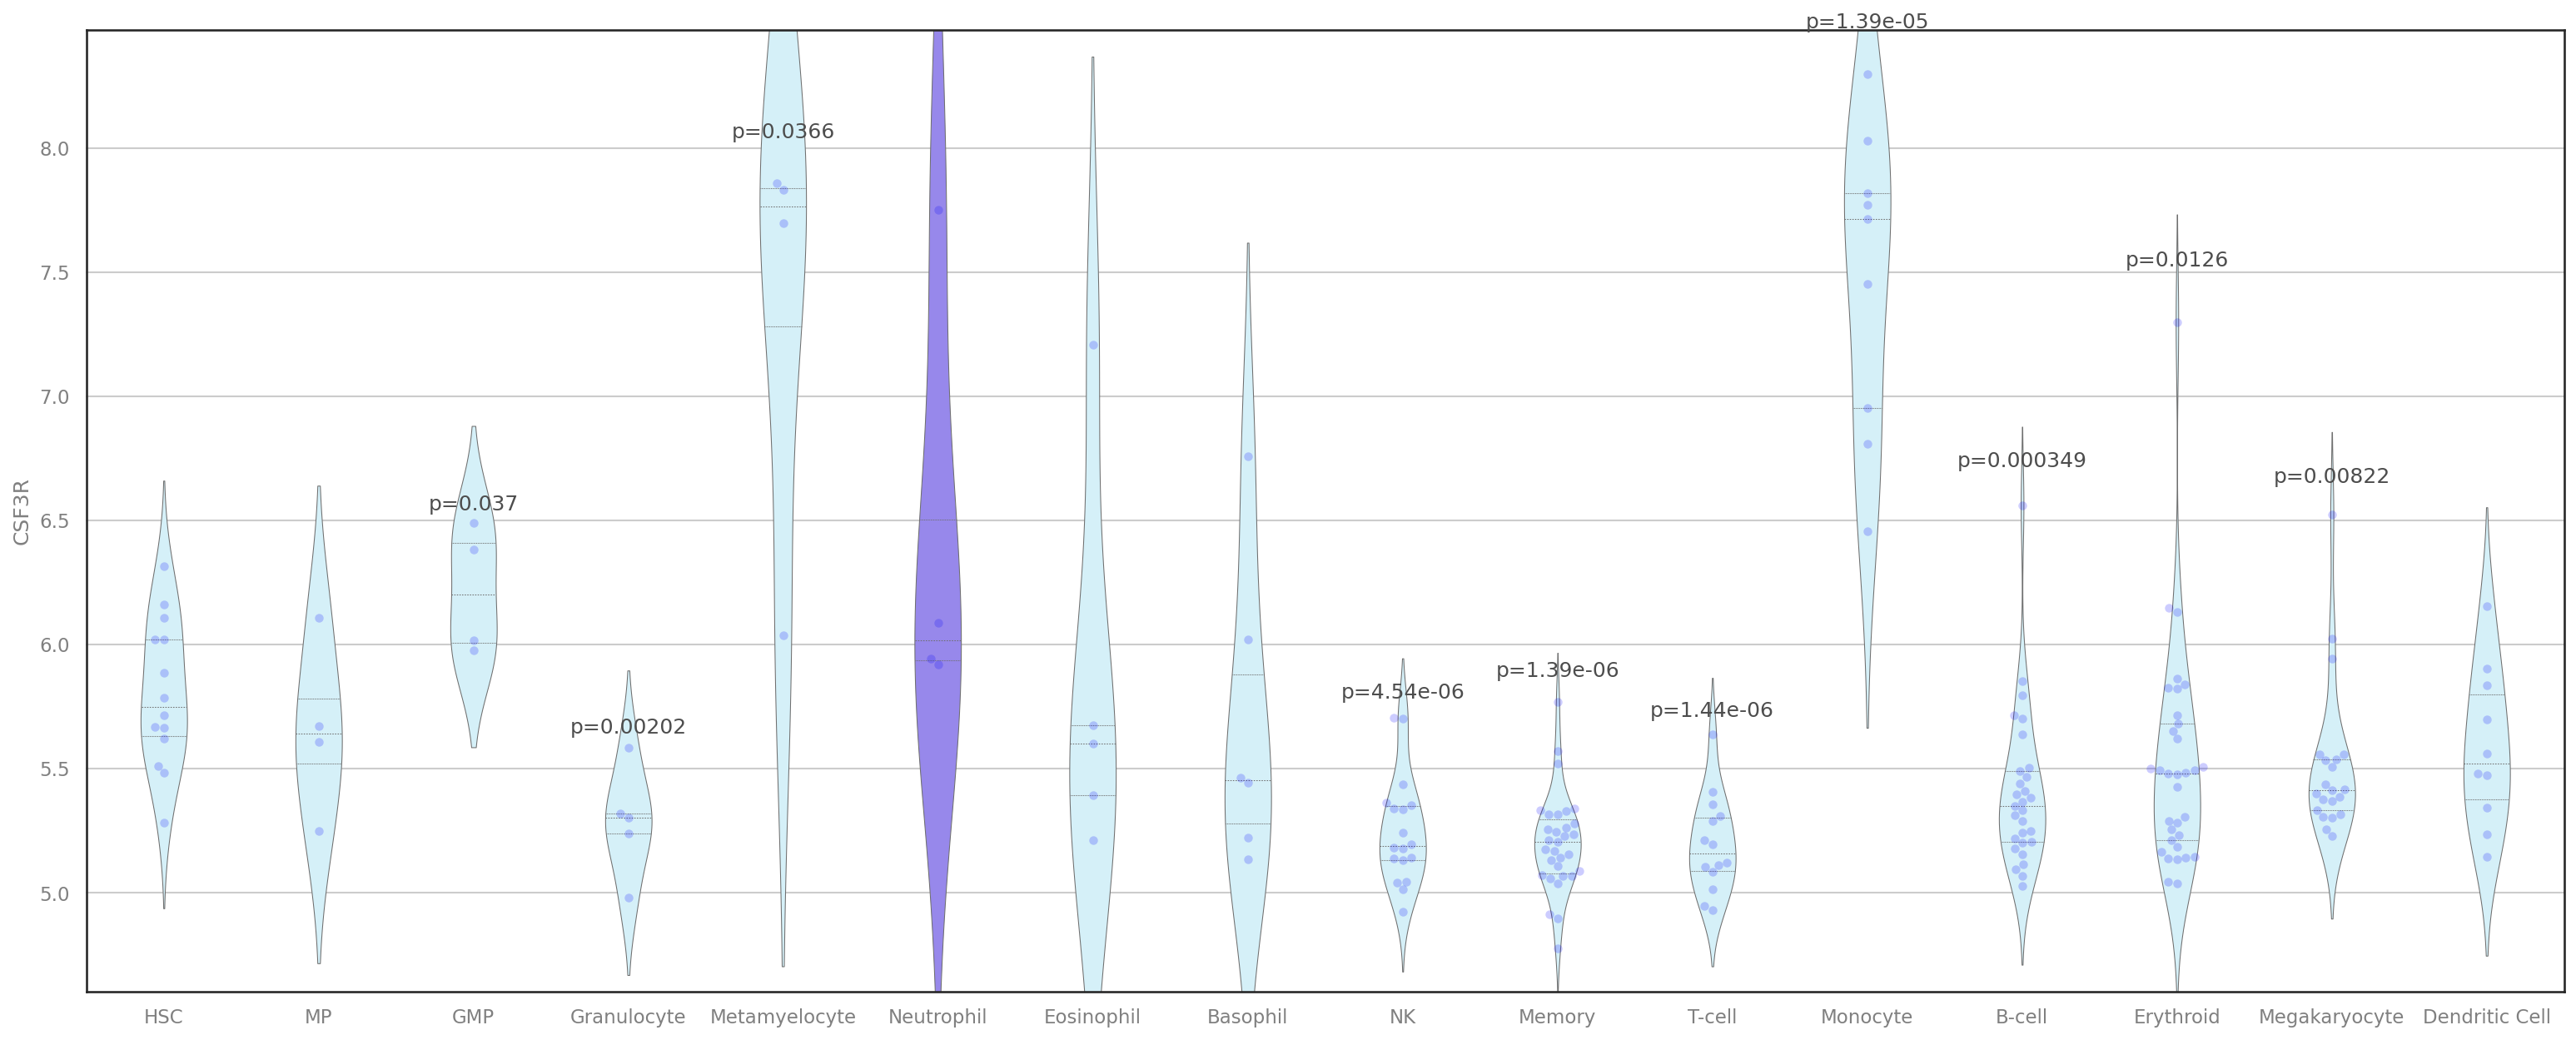

In [56]:
# Violin plot in Novershtern dataset
h = getDataset("G19")
samples = getNorvershternSamples(tn=2)
testGenes(['CSF3R'], samples, tn=2, w=1.6, h=10, highlight="Neutrophil")

KCNJ15
NAMPT
Error or could not find NAMPT
DYSF
BASP1
TNFRSF1A


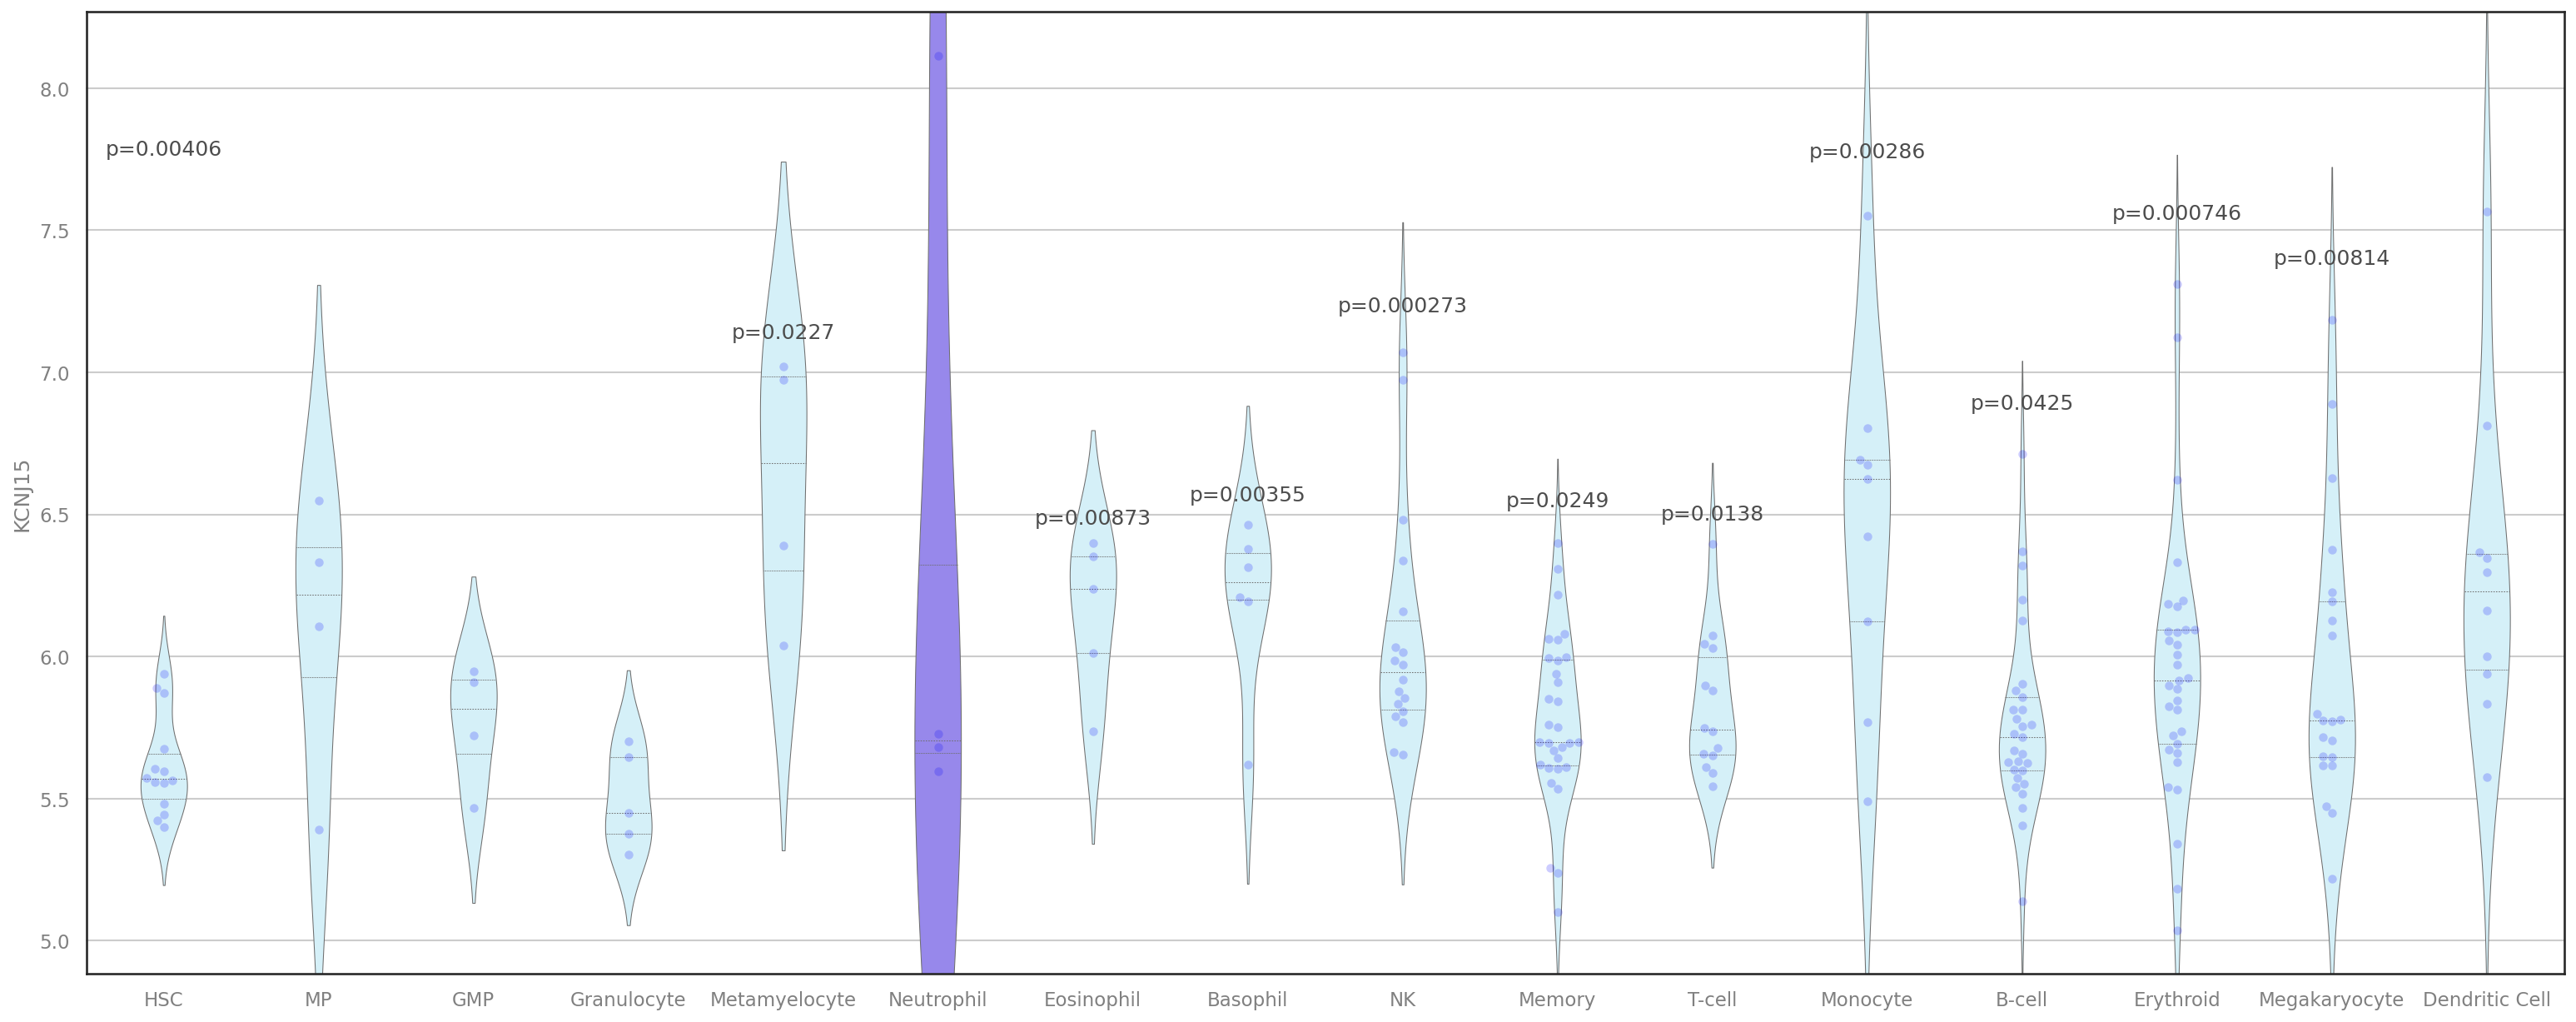

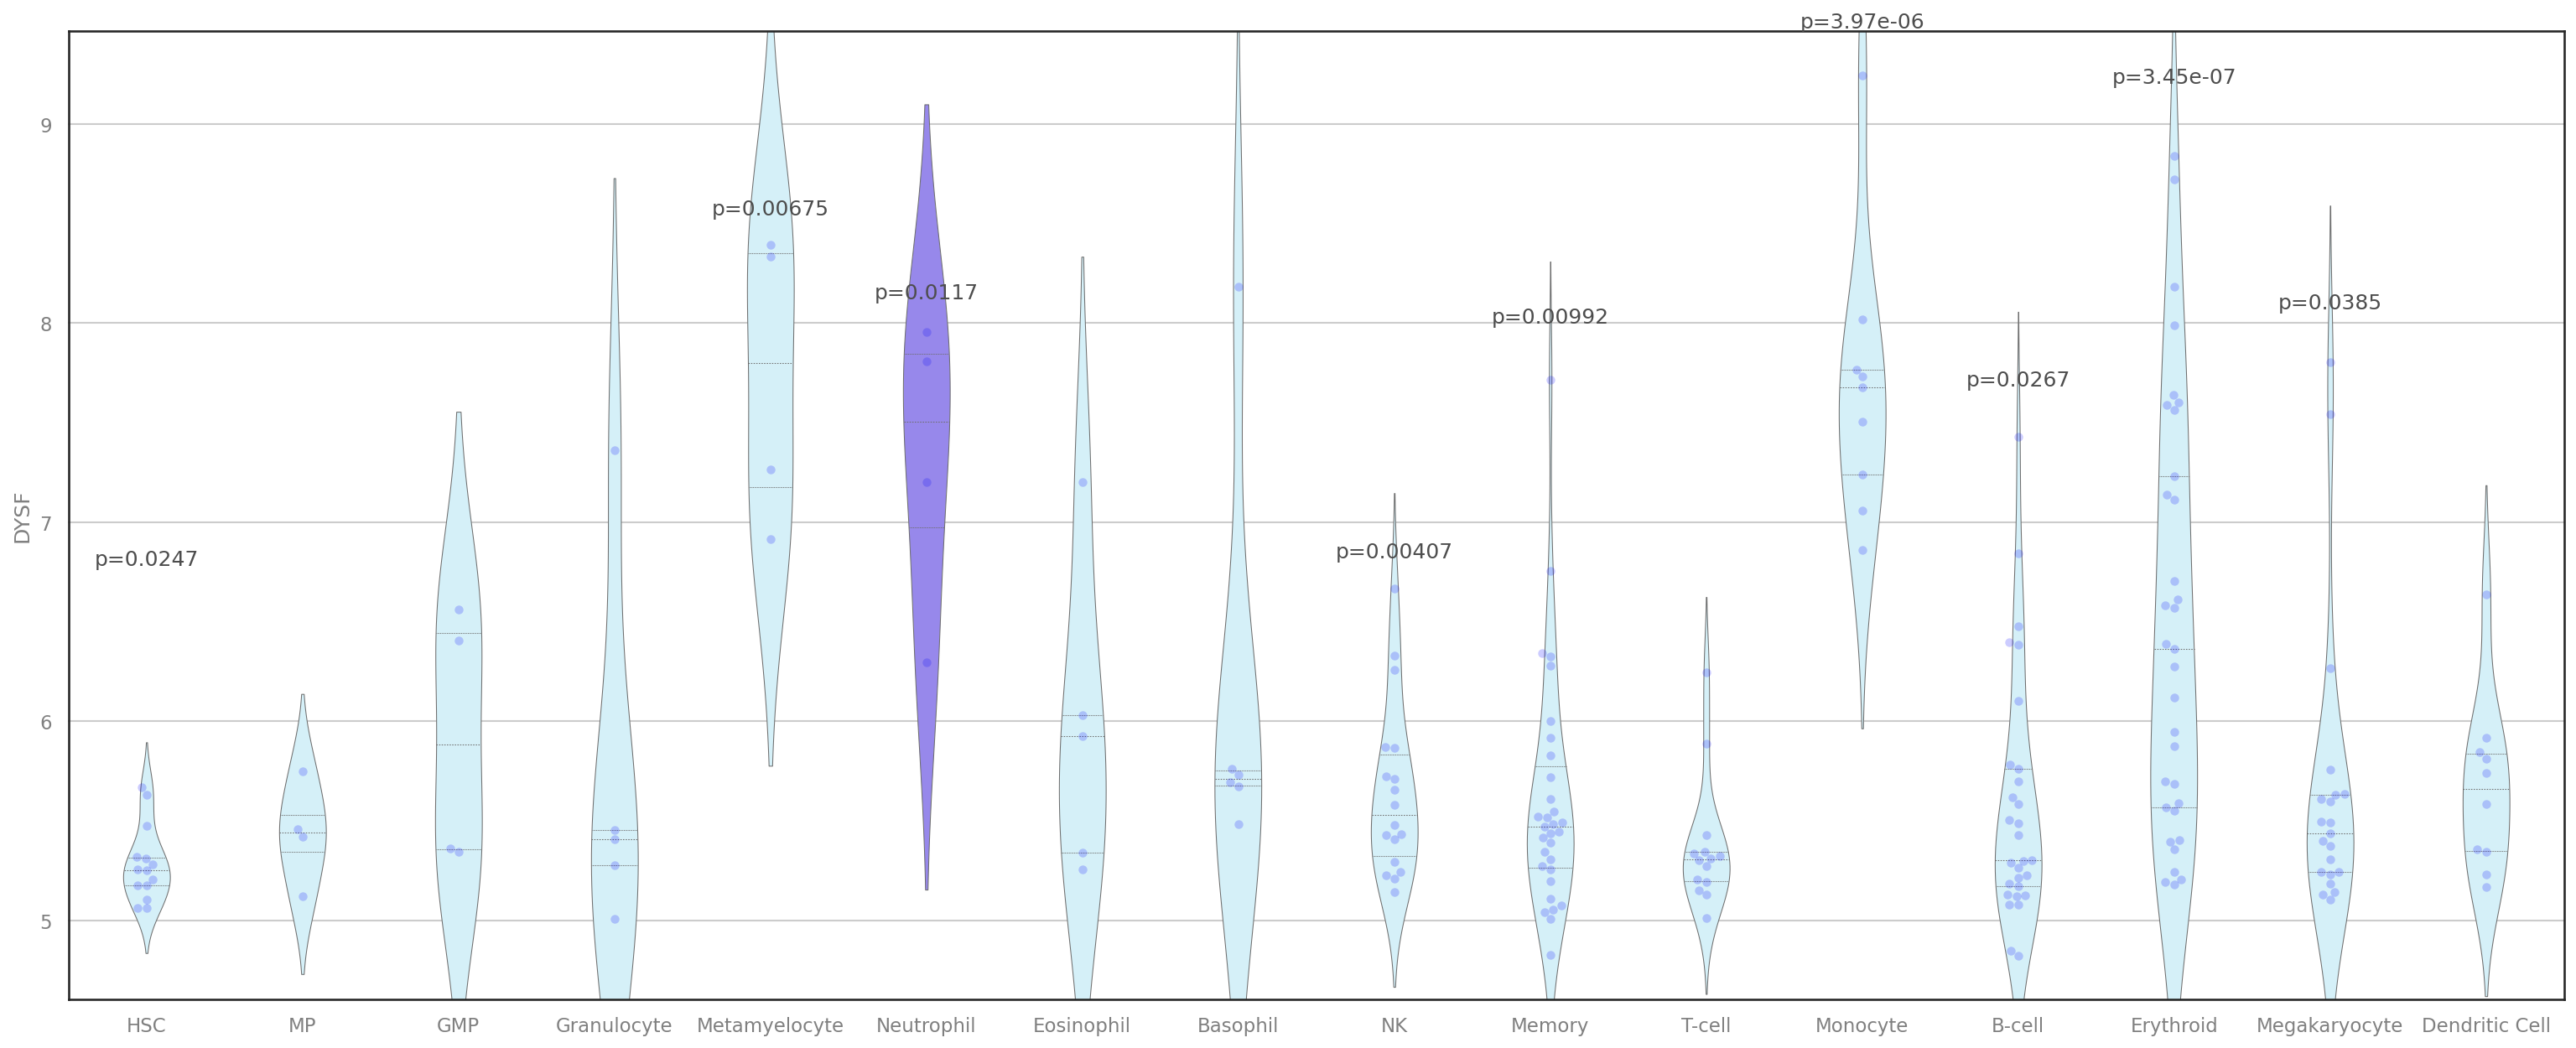

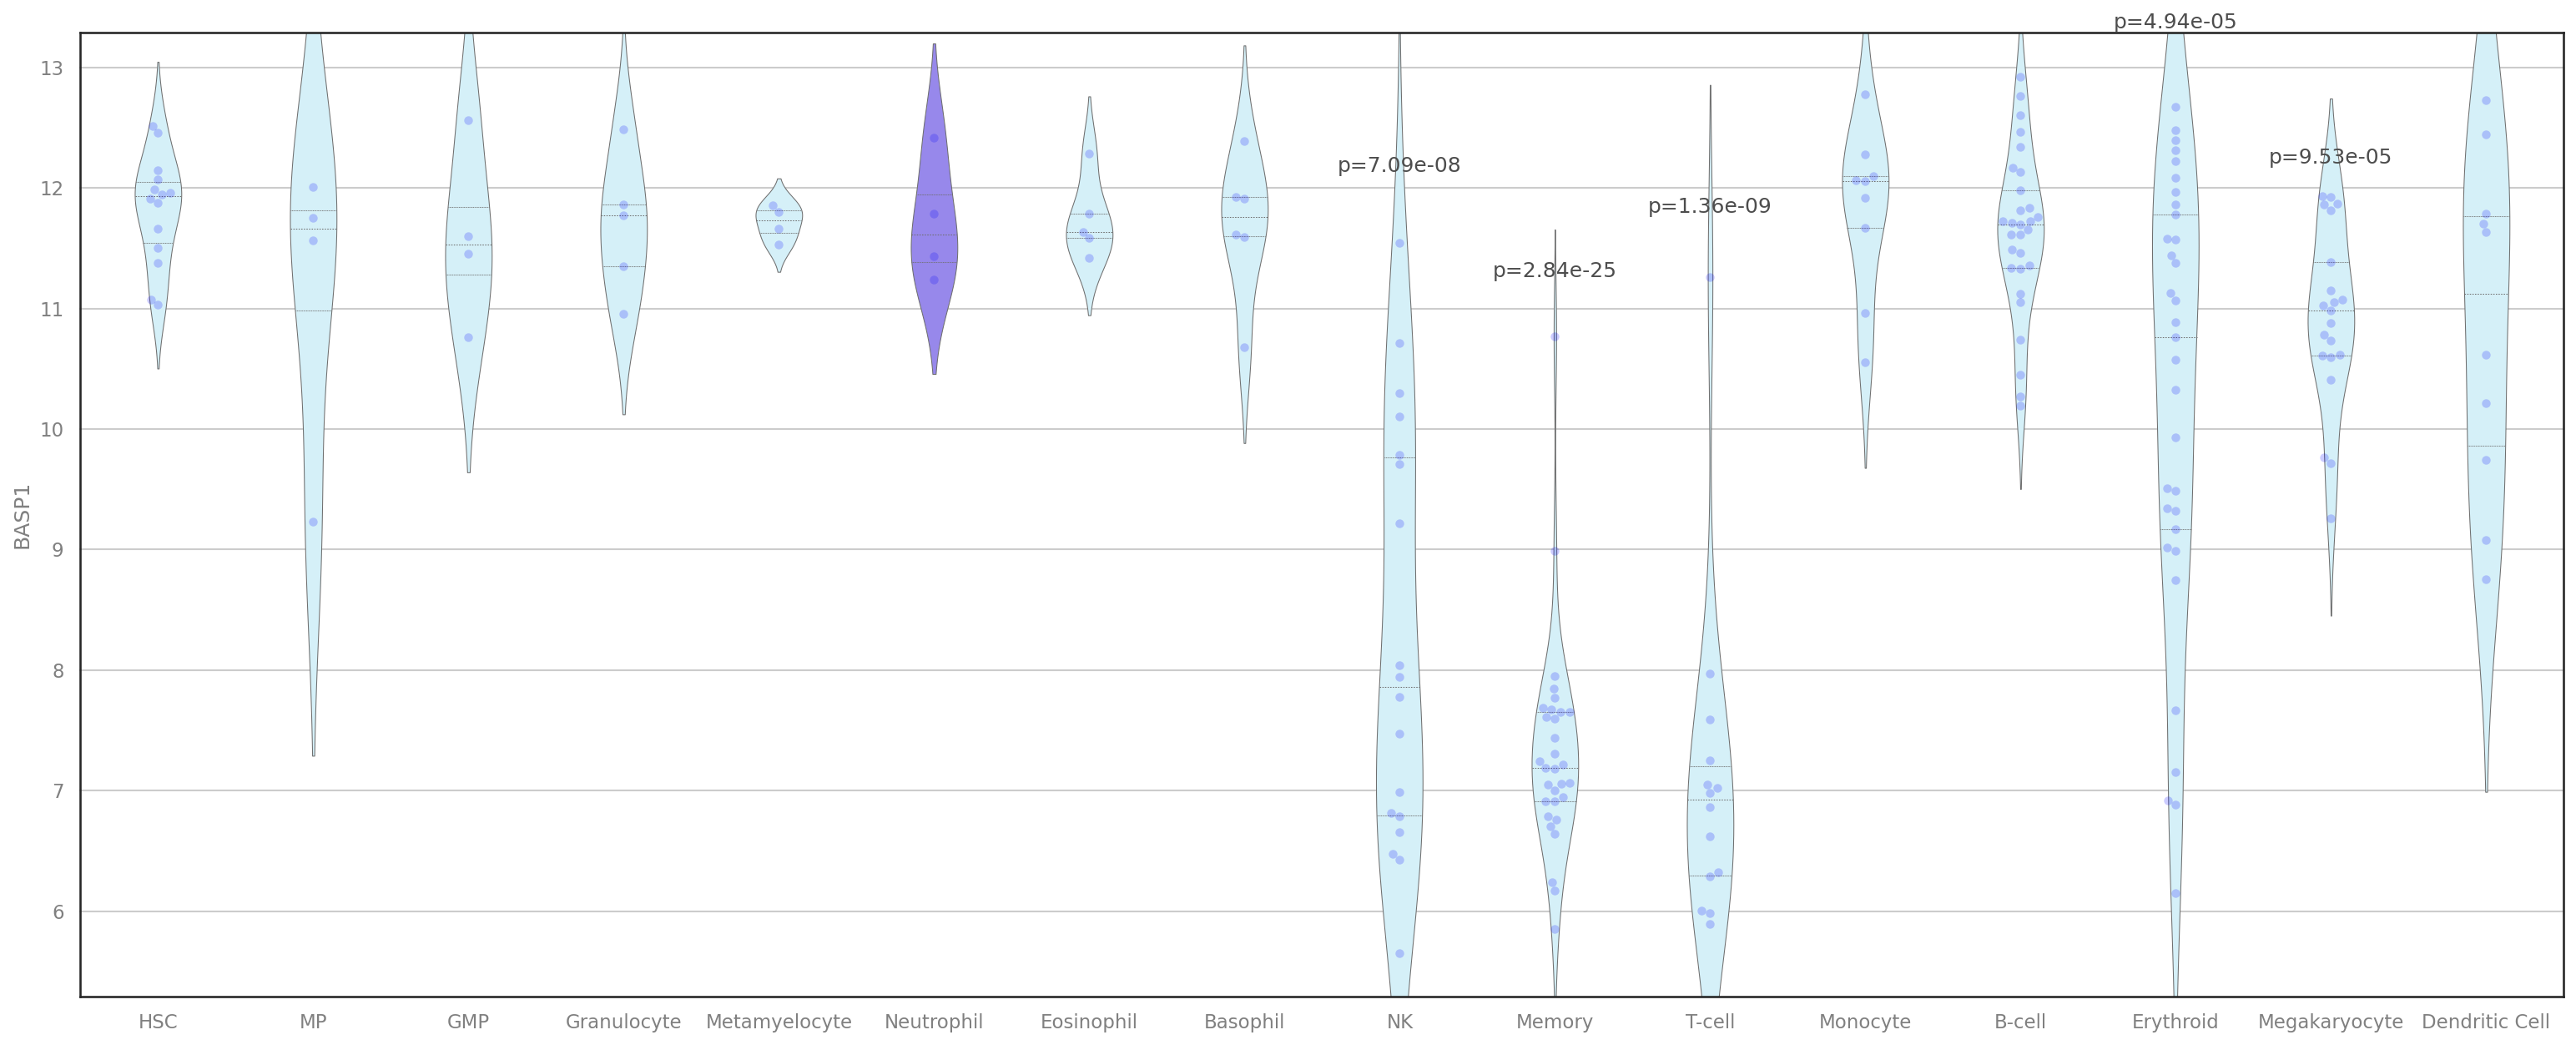

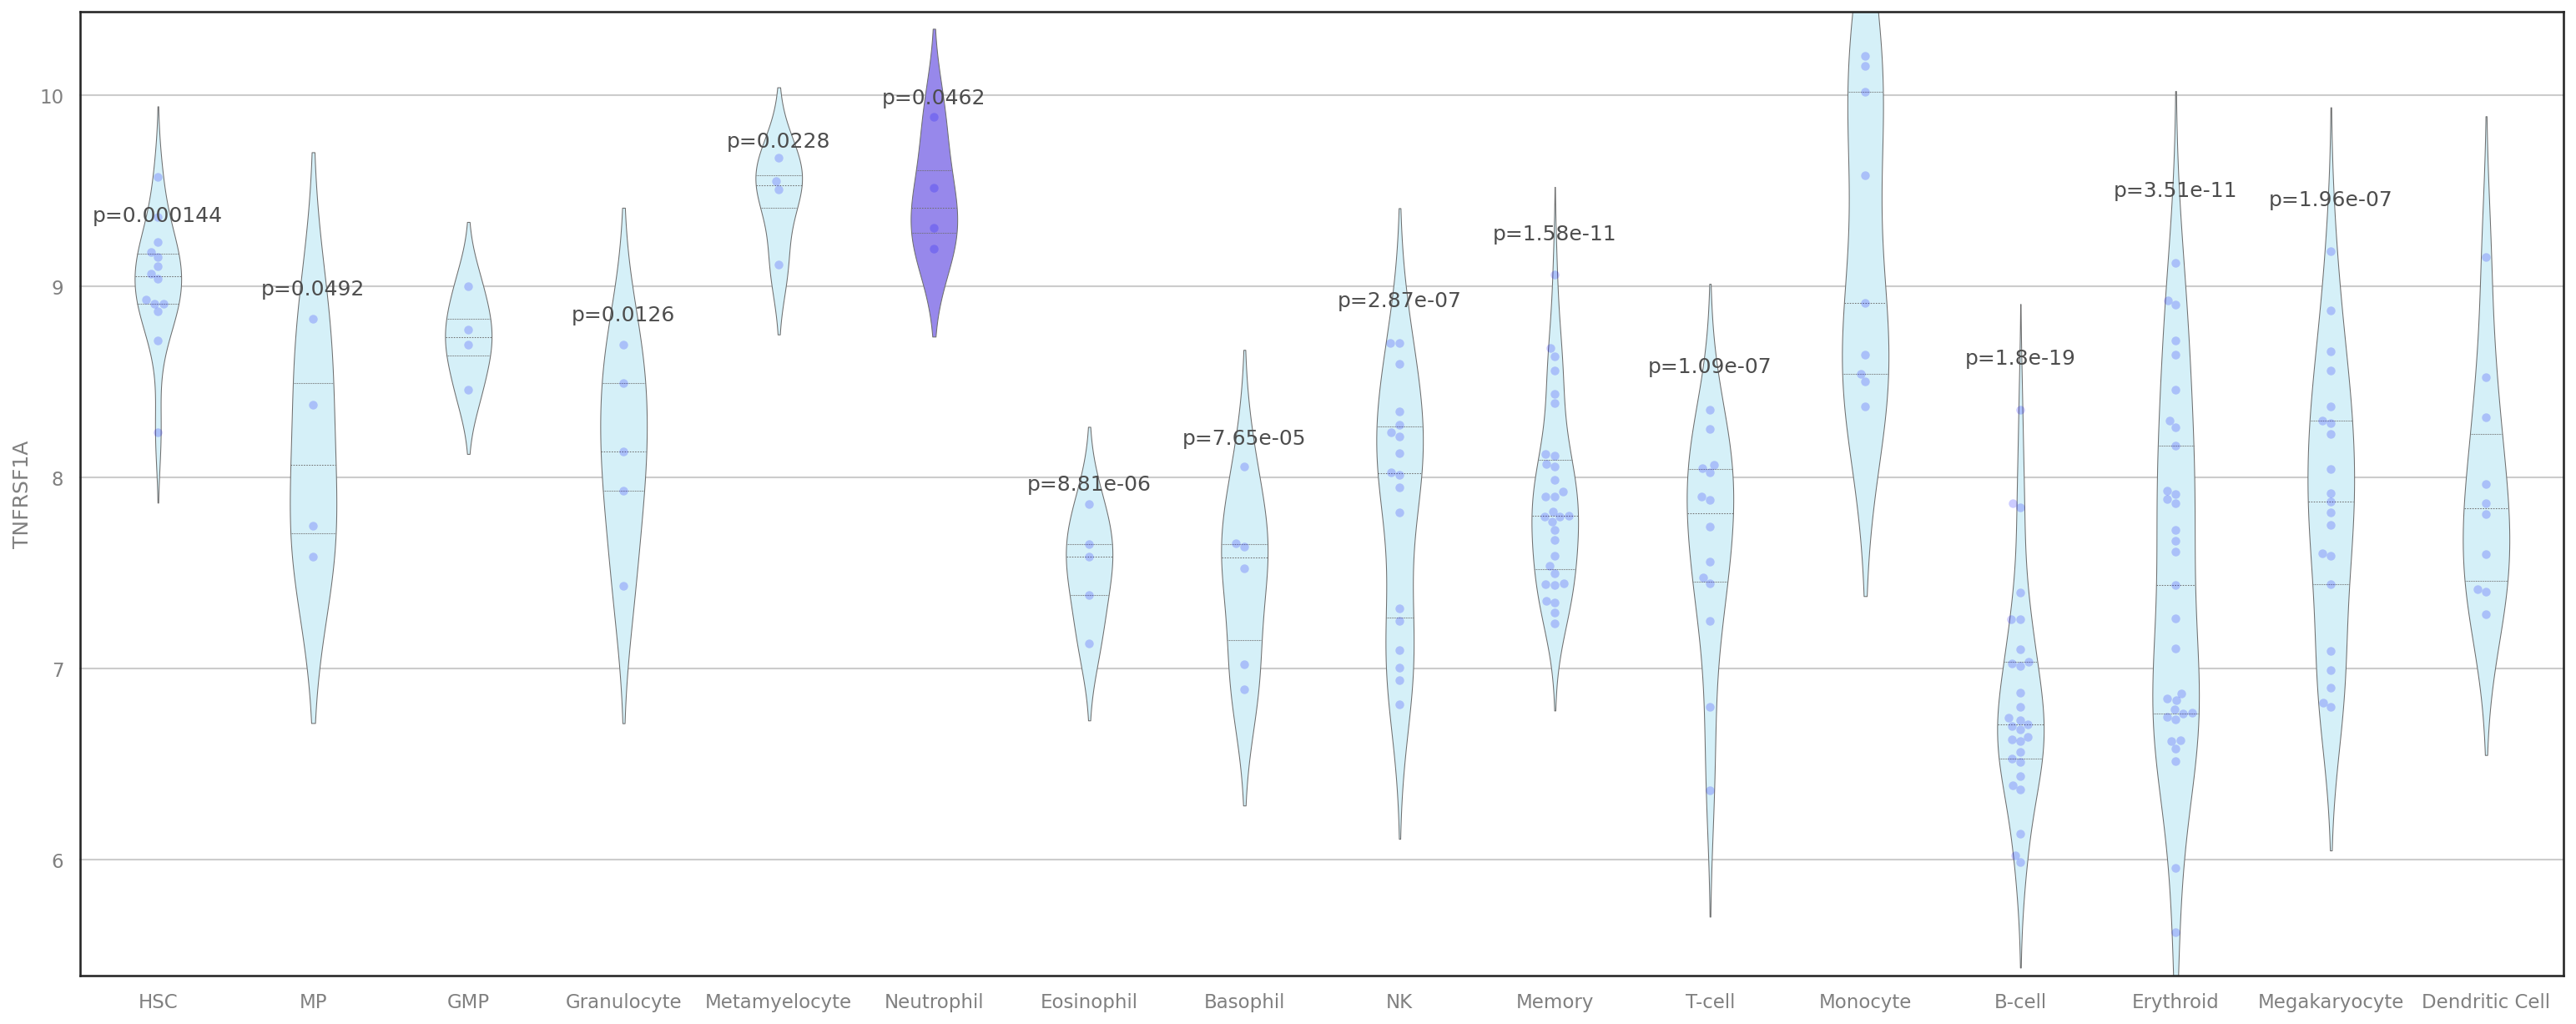

In [59]:
# Violin plot in Novershtern dataset
res = ['KCNJ15', 'NAMPT', 'DYSF', 'BASP1', 'TNFRSF1A']
h = getDataset("G19")
samples = getNorvershternSamples(tn=2)
testGenes(res, samples, tn=2, w=1.6, h=10, highlight="Neutrophil")